# Исследования в области продаж компьютерных игр

Представлены данные по интернет-магазину «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Цель исследования: выявить определяющие успешность игры закономерности

Исследование пройдет по следующим шагам:
1. Обзор данных.
2. Подготовка данных.
3. Исследовательский анализ данных:
    - анализ количества игр, выпущенных за разные годы.
    - анализ продаж по платформам
    - анализ продаж в разбивке по платформам
    - влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы
    - продажи игр на других платформах
    - распределение по жанрам.
4. Портрет пользотваеля каждого региона:
    - самые популярные платформы (ТОП-5)
    - самые популярные жанры (ТОП-5)
    - влияние рейтинга ESRB на продажи
5. проверка гипотез.

### Обзор данных

**Задание 1. Импортируем библиотеки.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

**Задание 2. Считаем данные из csv-файла в датафрейм и сохраним в переменную data. Путь к файлу:/datasets/games.csv**

In [2]:
data = pd.read_csv('/datasets/games.csv')

**Задание 3. Проверим качество данных. Выведем 5 строчек таблицы на экран, чтобы ознакомиться с содержимым файла.**

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Задание 4. Выведем основную информацию о датафрейме. Найдем дубликаты.**

In [4]:
data.info()
print('\nЧисло дубликатов:', data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Число дубликатов: 0


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


После вызова метода info() выявлено несоответствие типов данных и наличие пропусков, а именно: количество значений в столбцах различается, есть пропущенные значения в 6 столбцах из 10. Необходимо выяснить, с чем связаные данные пропуски и определить на какие значения их можно заменить (0, среднее, медиана), или исключить из таблицы, как выбросы.

**Задание 5. Построем общую гистограмму для всех числовых столбцов таблицы.**

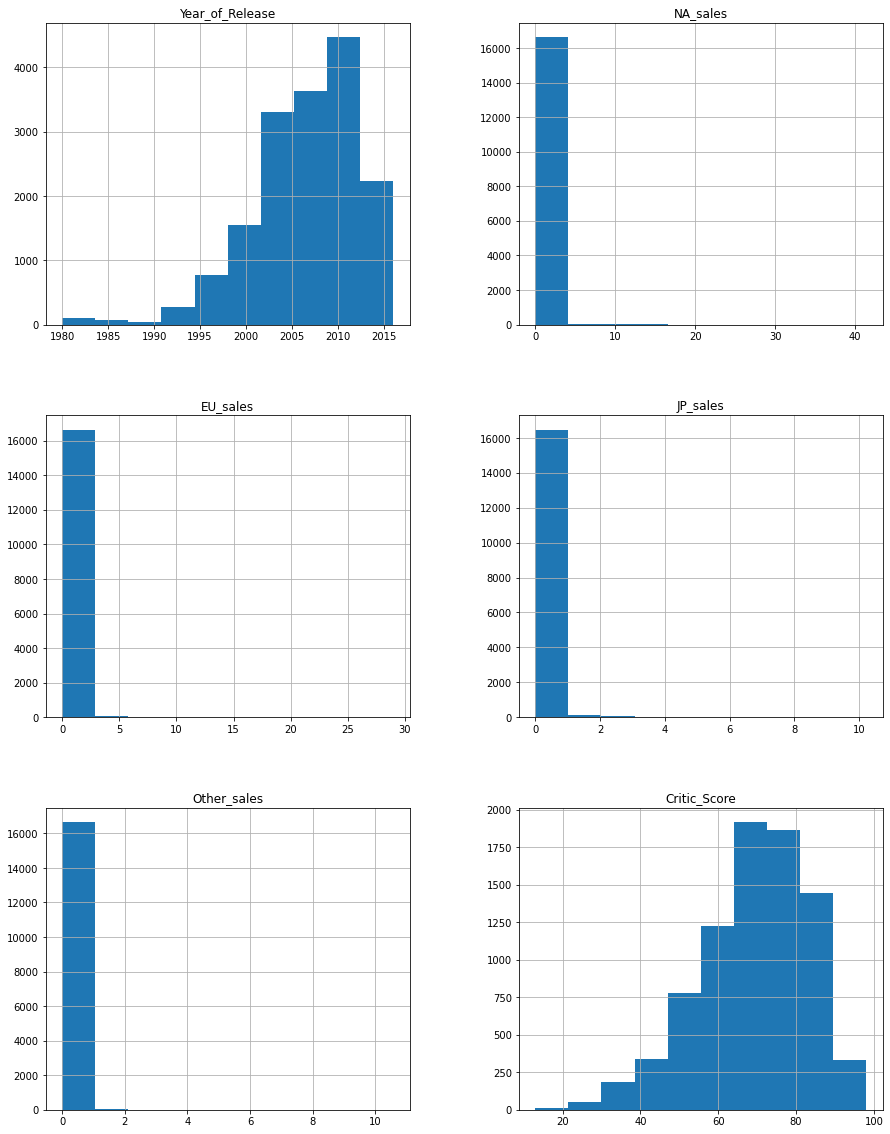

In [6]:
data.hist(figsize=(15, 20));

**Промежуточный итог по 1 шагу:**
1. импортировали все необходимые библиотеки,которые будут нужны для дальнейшей работы, выгрузили таблицу.
2. необходимо привести наименование столбцов к нижнему регистру.
2. выявлено несоответствие типов данных. На следующем шаге необходимо привести в соответствие.
3. выявлены пропуски. На следующем шаге будут рассмотрены причины пропусков, при необходимости они будут заполнены.

### Подготовка данных

#### Замена названия столбцов

In [7]:
# выведем текущее наименование столбцов
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [8]:
# приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Названия столбцов приведены к нижнему регистру.

#### Преобразование данных в нужные типы

In [9]:
# приведем данные столбца "Год выпуска" к целочисленному значению, потому что дробного значения года не бывает.
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: Int64

В целочисленном виде данные этого столбца выглядят привычнее, а от этого более понятными.

In [10]:
# проверим уникальные значения в столбце "Оценка пользователей"
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце "Оценка пользователей" присутствует непонятная пока аббревиатура 'tbd' помимо привычных цифр. Это сокращение часто используется в сфере компьютерных игр. Эта аббревиатура не скрывает в себе никаких таинственных смыслов и расшифровывается очень просто — To Be Determined, то есть «Будет определено». Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе «Дата выхода». Когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату, именно это сокращение и используется. Но также может быть использована и в случае с уже вышедшей игрой (возможно готовится к релизу какое-либо дополнение, однако пока не известно, когда именно оно будет выпущено). Естественно, может применяться и в других случаях, но данный вариант является самым распространенным. В играх, которые уже вышли, аббревиатуру можно встретить в темах, в которых обсуждаются предстоящие соревнования и сражения.

Таким образом, исходя из вышеизложенного, целесообразнее заменить 'tbd' на 'nan'.

In [11]:
# применим следующую функцию для замены значения 'tbd' на NaN

def replace_tbd_user_scores(tbd_user_scores, nan_user_score):
    data['user_score'] = data['user_score'].replace(tbd_user_scores, nan_user_score)

replace_tbd_user_scores('tbd', np.NaN)

# проверим уникальные значения в столбце после применения функции
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

После замены 'tbd' на 'nan' возможно изменение типа данных столбца 'user_score' на 'float'

In [12]:
data['user_score'] = data['user_score'].astype('float64')
data['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64

In [13]:
# проверим замену типа данных в двух столбцах 'year_of_release' и 'user_score'.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


В двух столбцах 'year_of_release' и 'user_score' типы данных изменены на int  и float соответственно.

#### Обработка пропусков

In [14]:
# найдем в каких столбцах есть пропуски
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [15]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,54.600000


<div class="alert alert-info"> 
<b>Комментарий студента v.1</b> 
    
Мне захотелось попробовать применить рекомендацию прямо сейчас. Это супер! Мне очень понравилось) Эта находка в моей копилке)
</div>

В 6 столбцах есть пустые ячейки:
1. столбец name отвечает за название компьютерной игры. Оставить его пустым нельзя, так как непонятно о какой видеоигре идет речь, при этом количество пропусков в данном столбце минимально - 2 строки, поэтому мы принимаем решение удалить эти 2 строки. Причиной пропуска данных в этом столбце может быть ошибка при заведении данных.
2. в столбце 'year_of_release' указан год выпуска компьютерной игры. Пропуск в данном столбце мог возникнуть из-за того, что при заполнении данных об игре забыли указать эти данные, или точная дата выхода игры не определена. Эти строки мы также удалим.
3. данные в столбце 'genre' сложно подвести к какому-либо значению, количество пропусков в данном столбце минимально - 2 строки. Также удаляем строки с пустыми значениями. Пропуск в данном столбце мог возникнуть из-за того, что при заполнении данных об игре его забыли указать, или не определились, к какому именно жанру относится компьютерная игра.
4. пропуски значений в столбцах critic_score, user_score оставим без изменений во избежание искажения результатов дальнейшего анализа. Причиной пропусков в данных столбцах может быть то, что критики и пользователи не сочли нужным оценить эту игру, или компьютерная игра только вышла и еще не получила своих оценок.
5. столбец rating содержит довольно много пропусков, однако определить, каким данными они могут быть заполнены не представляется возможным. Поэтому данные в этом столбце мы оставим так, как есть. Причиной пропуска в данном столбце может быть отсутствие информации, по которой компьютерную игру можно отнести к определенному рейтингу.

In [16]:
# выведем содержимое столбцов, в которых обнаружены пропуски
display(data['name'].unique())
display(data['year_of_release'].unique())
display(data['genre'].unique())
display(data['critic_score'].unique())
display(data['user_score'].unique())
display(data['rating'].unique())

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
# посмотрим на пропуски в столбце name
data[data.name.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [18]:
# посмотрим на пропуски в столбце genre
data[data.genre.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в столбцах 'name' и 'genre' расположены в одних и тех же строках (индексы 659 и 14244).

In [19]:
# удалим пропуски в столбце 'name', они удалятся и в столбце 'genre'
data.dropna(subset=['name'], inplace = True)

In [20]:
data[data.name.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропуски в столбце 'name' удалены.

In [21]:
# посмотрим на пропуски в столбце 'genre'
data[data.genre.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропуски в столбце 'genre' удалены.

In [22]:
# удалим пропуски в столбце 'year_of_release'
data.dropna(subset=['year_of_release'], inplace = True)

In [23]:
# еще раз проверим пропуски
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Пропуски в столбцах name, year_of_release, genre удалены. Пропуски в столбцах critic_score, user_score, rating оставим без изменения.

#### Подсчет суммарных продаж

In [24]:
# добавим новый столбец суммарных продаж
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Промежуточный итог по 2 шагу.**

В результате предобработки данных:
1. названия столбцов приведены к нижнему регистру., так как формат разных регистров в наименовании столбцов считается некорректным.
2. значения user_score, равные 'tbd' (To Be Determined) изменено на пропуски значений (значение nan).
3. в двух столбцах 'year_of_release' и 'user_score' типы данных изменены на int и float соответственно.
4. удалены строки с пропусками данных в столбцах name и genre (2 строки), year_of_release (269 строк).
5. пропуски в столбцах name, year_of_release, genre удалены. Пропуски в столбцах critic_score, user_score, rating оставим без изменения.
6. добавлен новый столбец total_sales с суммарными продажами во всех регионах.

### Исследовательский анализ данных

#### Анализ количества выпущенных игр за разные годы.

In [25]:
data_years = data.groupby('year_of_release')['name'].agg('count').reset_index()
data_years.columns = ['year_of_release', 'count']
data_years

,year_of_release,count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


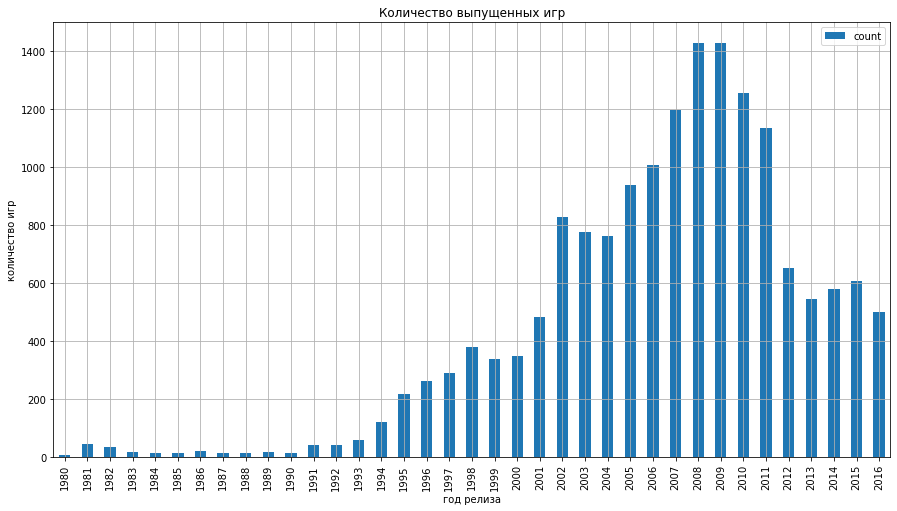

In [26]:
# построим гистограмму
data_years.plot.bar(x = 'year_of_release', y = 'count', grid=True, title='Количество выпущенных игр',
                   figsize=(15,8)).set(xlabel='год релиза', ylabel='количество игр');

Как видно по диаграмме, до 90-х годов выпуск компьютерных игр носил незначительный характер. С начала 2002 года наблюдается увеличение выпуска игр, что связано с развитием в общем компьютерной культуры и грамотности у населения, и все большим интересом к такому хобби, как видеоигры. Пик роста пришелся на 2008 -2009 годы. Затем опять наблюдается спад, при этом объемы выпуска в 2016 году практически вернулись на уровень 2001 года. Данные до 90-х занимают ничтожную долю, поэтому в последующем мы не будем их анализировать.

In [27]:
# сделаем срез данных (уберем данные до 90-х годов)
data_after_90 = data.query('year_of_release > 1990')

#### Анализ продаж по платформам

In [28]:
# сгруппируем данные по платформам по количеству и суммарным продажам
data_platform = data_after_90.groupby('platform')['total_sales'].agg(['count', 'sum']).sort_values(by='sum', ascending = False).reset_index()
data_platform.columns = ['platform', 'platform_count', 'platform_sales' ]
data_platform

,platform,platform_count,platform_sales
0,PS2,2127,1233.56
1,X360,1232,961.24
2,PS3,1306,931.34
3,Wii,1286,891.18
4,DS,2120,802.76
5,PS,1190,727.58
6,PS4,392,314.14
7,GBA,811,312.88
8,PSP,1193,289.53
9,3DS,512,257.81


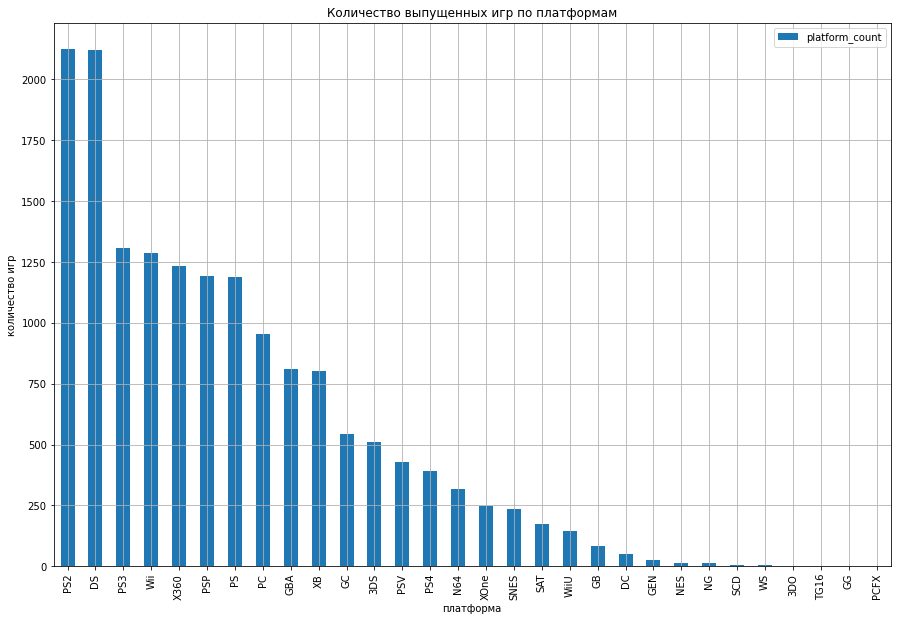

In [29]:
data_platform.sort_values(by='platform_count', ascending=False).plot.bar( x = 'platform', y = 'platform_count', grid=True, title='Количество выпущенных игр по платформам',
                   figsize=(15,10)).set(xlabel='платформа', ylabel='количество игр');

In [30]:
# сгруппируем данные по количеству вышедших игр в разрезе платформ и по годам
data_platform_year = data_after_90.groupby(['platform', 'year_of_release'])['name'].count()
data_platform_year

platform  year_of_release
3DO       1994                 1
          1995                 2
3DS       2011               116
          2012                93
          2013                91
                            ... 
XB        2008                 1
XOne      2013                19
          2014                61
          2015                80
          2016                87
Name: name, Length: 212, dtype: int64

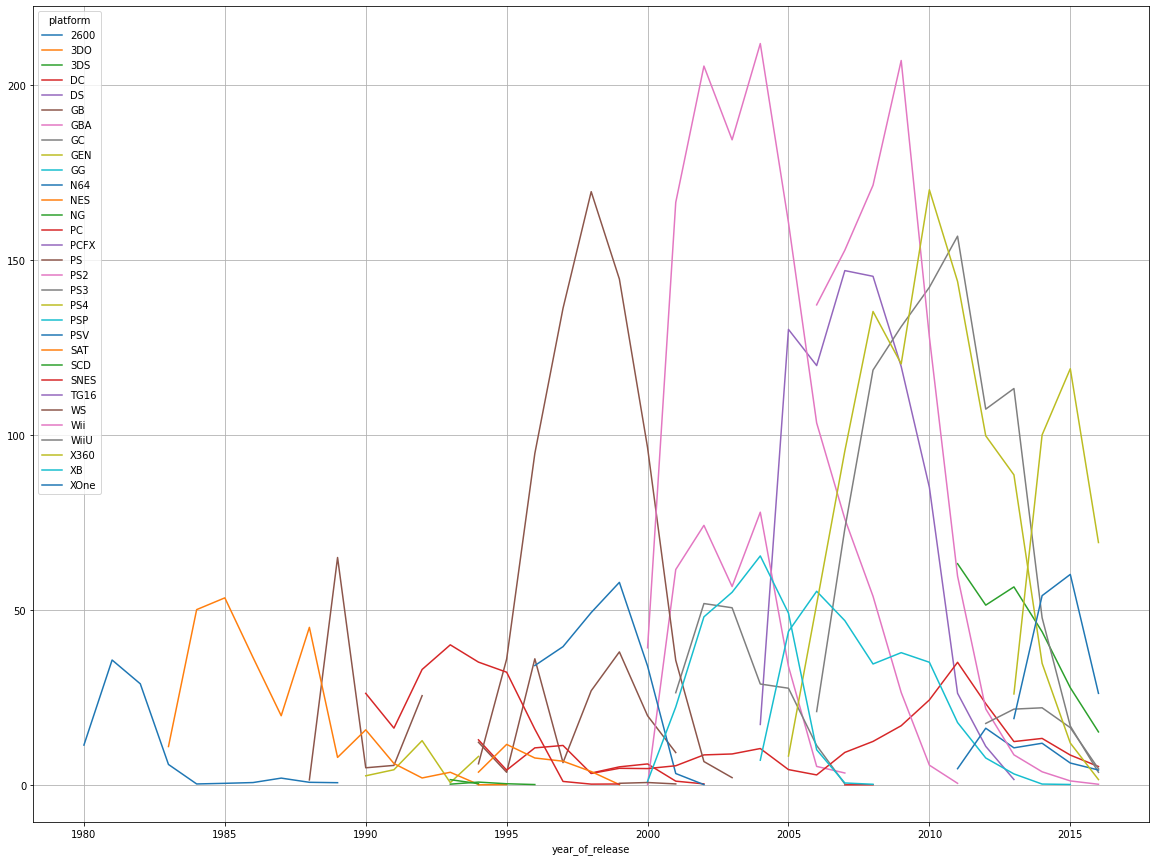

In [31]:
# посторим график распределения по годам в разрезе платформ и суммарных продаж
data.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(20, 15))
plt.show()

Рассмотрим получившийся график.
Все платформы не существуют бесконечно, у каждой есть свой цикл жизни, ограниченный 7-10 годами. Следовательно, платформы, представленные до 2012 - 2014 г.г., уже не существуют (их заменили новые, более перспективные), не будем учитывать их в анализе. Актуальным периодом для прогноза на 2017 год определим следующие года: 2013-2016 г. если взять меньшее количество лет, то непонятно в какой стадии находится конкретная платформа: она только начинает свой рост или уже заканчивает свое существование.
Можно отметить следующую закономерность- резкий всплеск продаж после выпуска, 5-летний (в среднем) пик, и спад, растянутый на несколько лет.

Чтобы не учитывать данные неактуального периода (прошлых лет) сделаем срез и построим новый график.

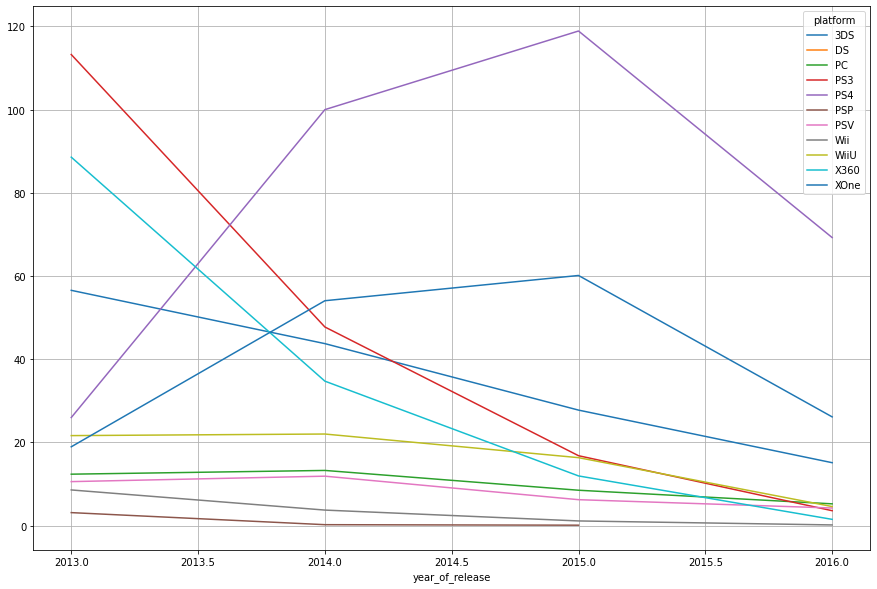

In [32]:
data_optimal = data.query('2013 <= year_of_release <= 2016')
data_optimal.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(15, 10))
plt.show()

На графике мы можем заметить, что продажи c 2015 по 2016 гг стремительно уменьшались и из всех платформ в выборке остались только две, по которым показатели значительно положительные. Это платформы PS4 (фиолетовая линия), XOne (синяя линия) и 3DS (голубая линия). По остальным платформам показатель находится менее 20 млн копий, некоторые приближаются к 0.

Несмотря на то, что платформы PS4 и XOne показывают самые высокие данные по количеству проданных копий, но за последний год и по этим двум платформам наблюдается значительное снижение.

#### Анализ глобальных продаж игр в разбивке по платформам

In [33]:
# сгруппируем данные, чтобы посмотреть, какие платформы еще существуют на рынке на 2016 год, и выведем основное описание
data_optimal.groupby('platform')['total_sales'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
X360,186.0,0.735484,1.663275,0.01,0.0800,0.265,0.7950,16.27
XOne,247.0,0.645020,1.036139,0.01,0.0600,0.220,0.6850,7.39
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51


In [34]:
data_optimal_3p = data_optimal.query("platform == ['XOne', 'PS4', '3DS']")
data_optimal_3p

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
...,...,...,...,...,...,...,...,...,...,...,...,...
16648,Mushi Bugyou,3DS,2013,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01


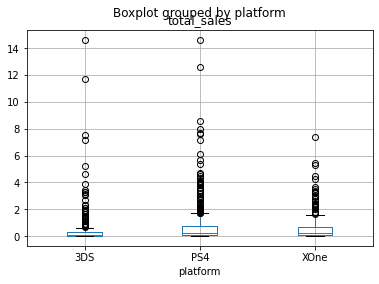

In [35]:
data_optimal_3p.boxplot(column='total_sales', by='platform')
plt.show;

Судя по графику, имеются выбросы значений по трем платформам, по PS4 и 3DS они более разбросаны, по XOne - расположены кучнее. Но мы не будем исключать эти выбросы, так как они могут характеризовать всплески продаж компьютерных игр.

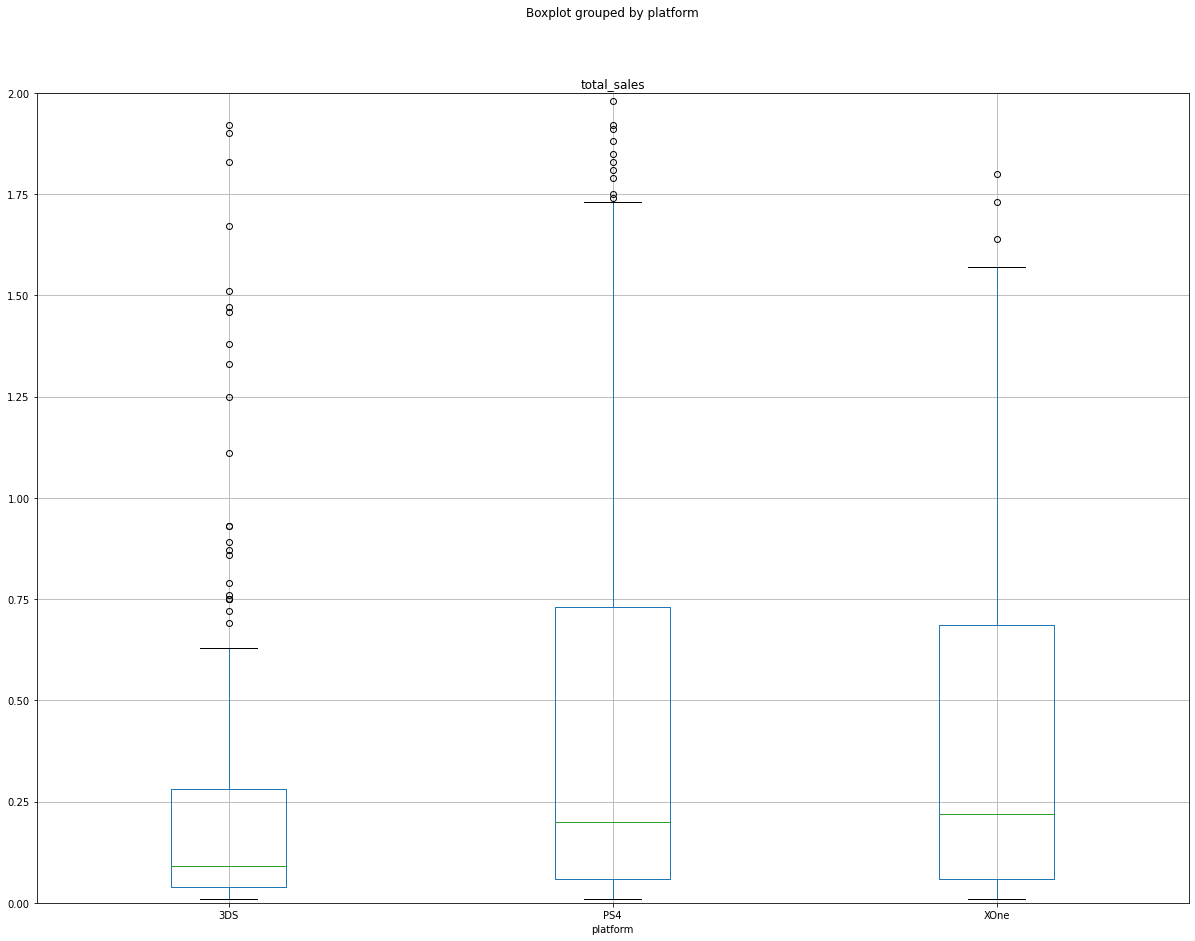

In [36]:
data_optimal_3p.boxplot(column='total_sales', by='platform', figsize=(20,15)).set(ylim=(0,2));
plt.ylim(0, 2)
plt.show;

<div class="alert alert-info"> 
<b>Комментарий студента v.1</b> 
    
Комментарий принят.
Построен новый график, на котром видны не только выбросы, но и медиана и 75%квантиль. 
Как и среднее значение, медиана является мерой положения центра распределения. В отличие от среднего значения, наблюдения с экстремальными значениями оказывают на нее меньшее влияние. Разница между средним значением и медианой указывает на то, что существуют наблюдения с экстремальными значениями. Больше всего продаж на платформе PS4.
</div>

#### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы 

Рассмотрим влияние на основе платформы PS4, так как у нее в 2016 году было больше всего продано копий.

,critic_score,total_sales
critic_score,1.00000,0.39238
total_sales,0.39238,1.00000


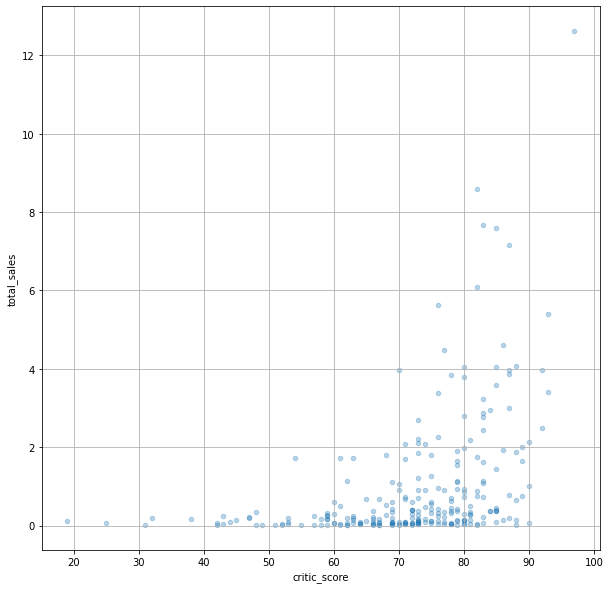

In [37]:
# построим диаграмму рассеяния по платформе PS4 с учетом отзывов критиков
data_optimal_3p[data_optimal_3p['platform']=='PS4'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(10,10), grid=True)
plt.show;
data_optimal_3p[['critic_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,-0.013552
total_sales,-0.013552,1.000000


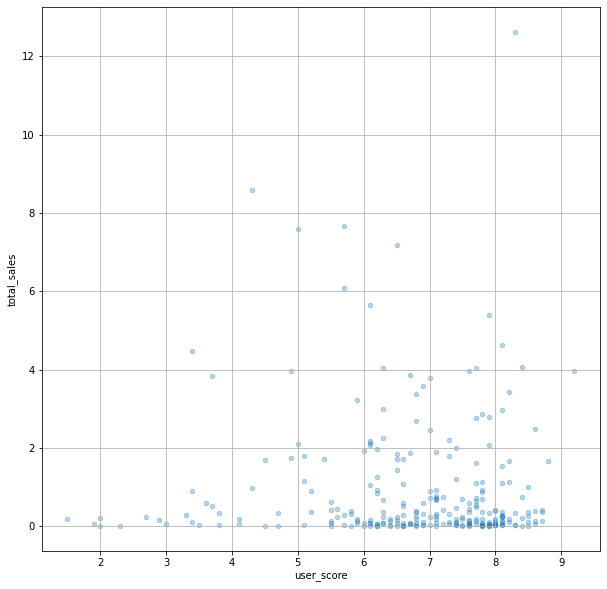

In [38]:
# построим диаграмму рассеяния по платформе PS4 с учетом отзывов пользователей
data_optimal_3p[data_optimal_3p['platform']=='PS4'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(10,10), grid=True)
plt.show;
data_optimal_3p[['user_score', 'total_sales']].corr()

Посмотрев на диаграммы рассеивания, можно сказать, что большую часть составляют высокие оценки (более 60 у критиков и более 6 у пользователей).
По данным из диаграммы рассеивания: слабо положительная корреляция 0.39238 по отзывам критиков, и слабо отрицательная корреляция -0.013552 по отзывам покупателей. Судя по коэффициенту корреляции между продажами и пользовательскими оценками связь отсутствует. В отличие от оценки игроков, оценка критиков сильнее отражается на объемах продаж, хотя о сильной прямой зависимости здесь тоже нет.

#### Продажи игр на других платформах

In [39]:
data_optimal.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


Построим диаграмму размаха по всем платформам. Сделаем пару диаграмм с уменьшением диапазона, тем самым мы уберем редкие выбросы и оставим более частые выбросы, которые так же важны для анализа.

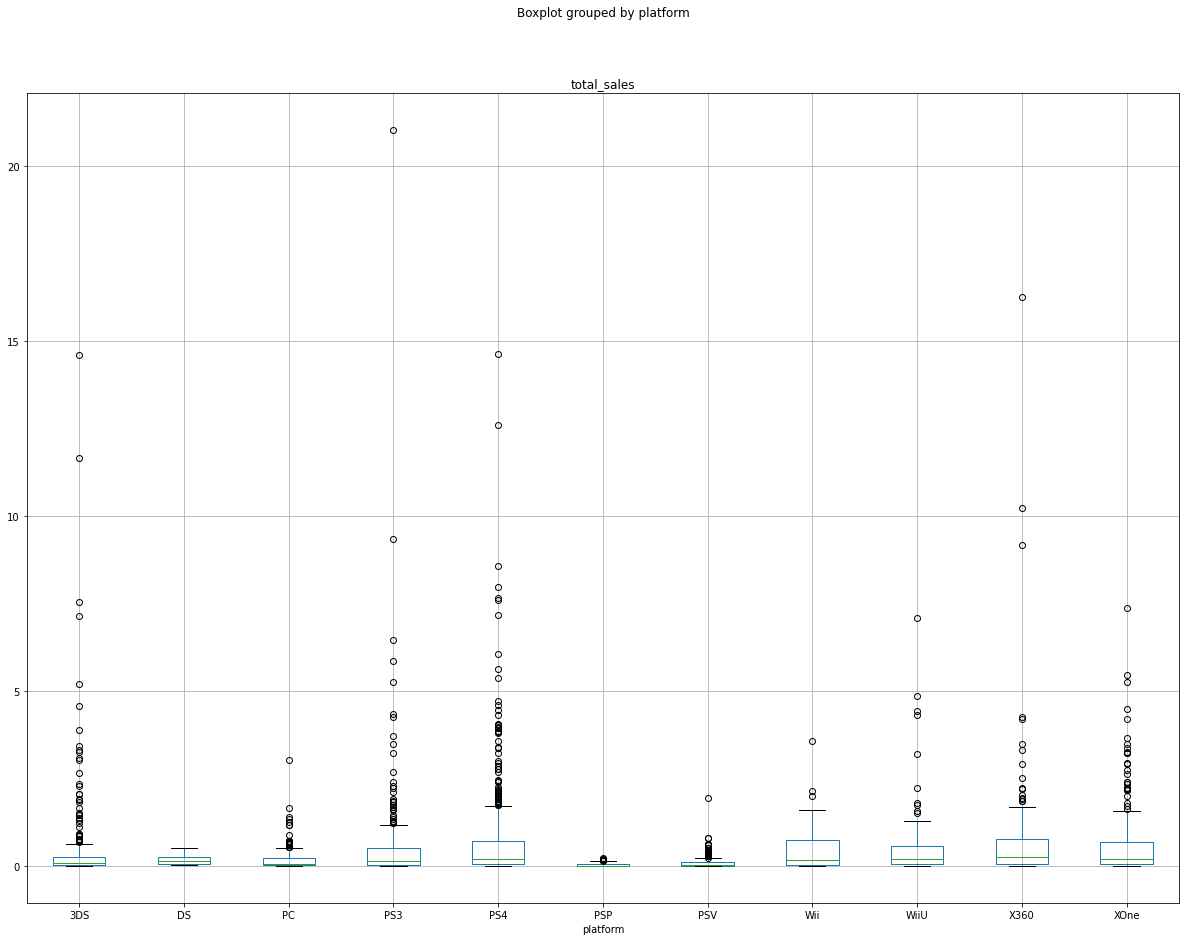

In [40]:
data_optimal.boxplot(column='total_sales', by='platform', figsize=(20,15));

Наблюдаются единичные выбросы более 10 млн. Они очень редкие. Уберем эти выбросы и еще раз посмотрим на диаграмму размаха.

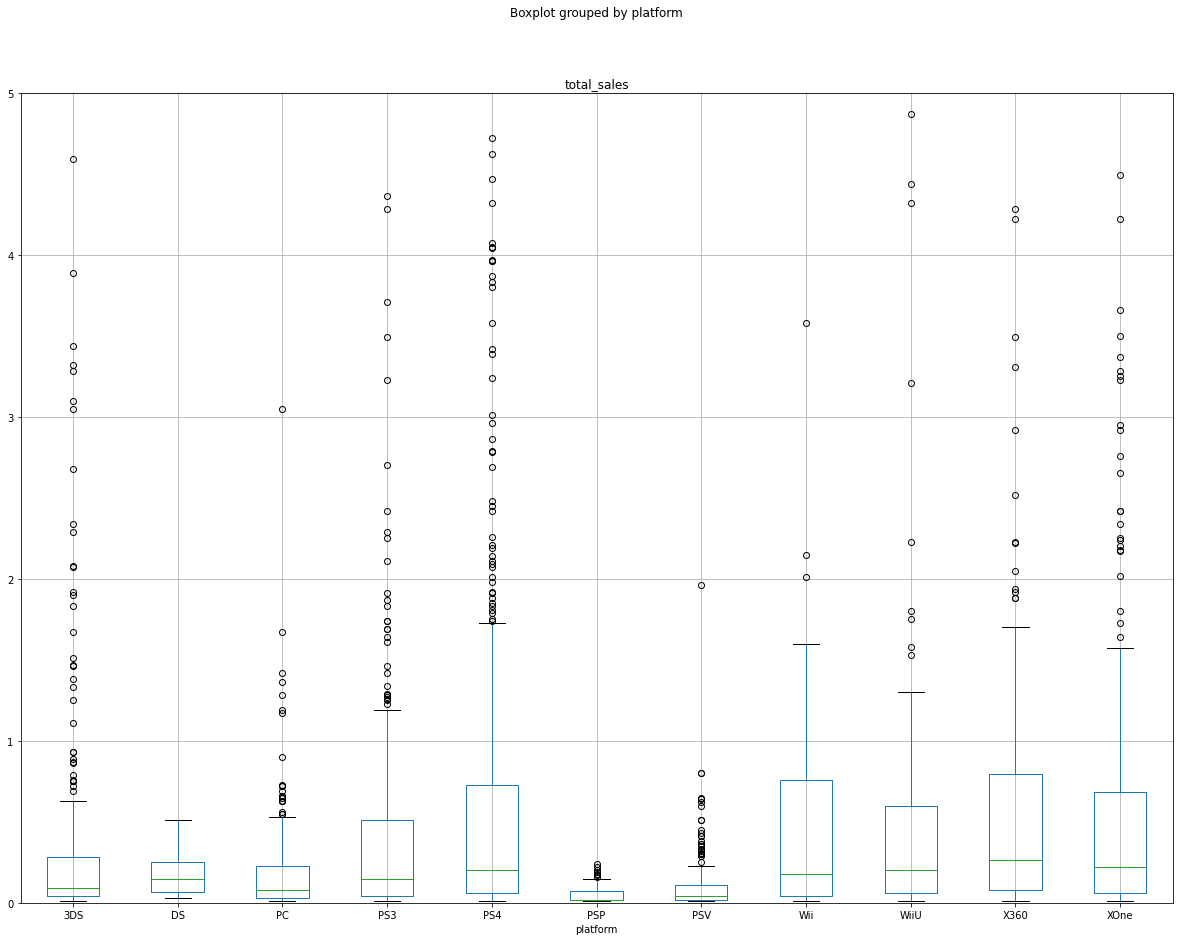

In [41]:
# сузим диапазон до 5 млн продаж
data_optimal.boxplot(column='total_sales', by='platform', figsize=(20,15)).set(ylim=(0,2));
plt.ylim(0, 5)
plt.show()

Боксплот показывает распределение продаж между платформами в 2013-2016 годы. Мы видим, что самое большое медианное значение и длинный "верхний" хвост -у Х360, PS3, PS4, XOne.

Согласно представленным данным (возможно они неполные) к концу 2016 года игровой рынок находится на спаде, продажи по всем платформам снижаются. Новые платформы пока не появились, имеющиеся не показывают тенденцию к росту, поэтому стоит остановиться на тех, кто появился относительно недавно (не стоит забывать про жизненный цикл платформ) и кто показывает наибольшие из имеющихся объемы продаж: PS4 -  69.25 млн., XOne - 26.15 млн. и 3DS -  15.14 млн.(только за 2016 год). До появления новой платформы эти игры будут пользоваться спросом и приносить магазину выручку.

<div class="alert alert-info"> 
<b>Комментарий студента v.1</b> 
    
Построим диаграммы рассеяния, показывающие влияние отзывов пользователей и критиков на продажи, и посчитаем корреляции для следующих платформ: X360, PS3, XOne, 3DS и PSV.
</div>

,critic_score,total_sales
critic_score,1.0000,0.3137
total_sales,0.3137,1.0000


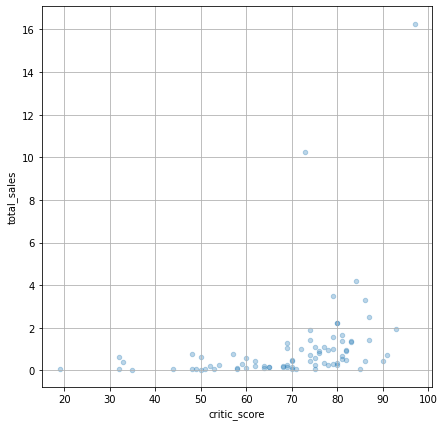

In [42]:
# построим диаграмму рассеяния по платформе X360 с учетом отзывов критиков
data_optimal[data_optimal['platform']=='X360'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(7,7), grid=True)
plt.show;
data_optimal[['critic_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,-0.002608
total_sales,-0.002608,1.000000


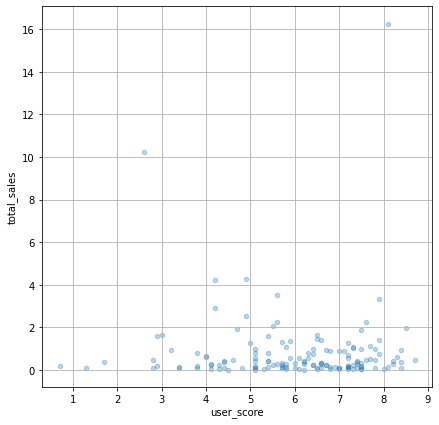

In [43]:
# построим диаграмму рассеяния по платформе X360 с учетом отзывов пользователей
data_optimal[data_optimal['platform']=='X360'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(7,7), grid=True)
plt.show;
data_optimal[['user_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.0000,0.3137
total_sales,0.3137,1.0000


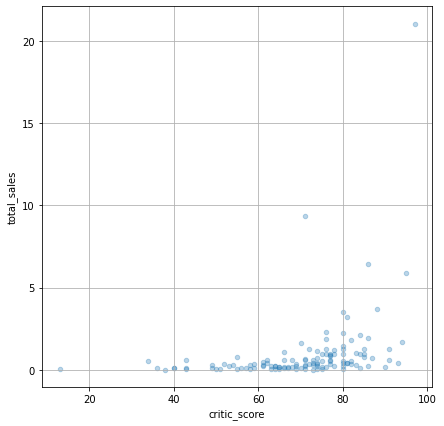

In [44]:
# построим диаграмму рассеяния по платформе PS3 с учетом отзывов критиков
data_optimal[data_optimal['platform']=='PS3'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(7,7), grid=True)
plt.show;
data_optimal[['critic_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,-0.002608
total_sales,-0.002608,1.000000


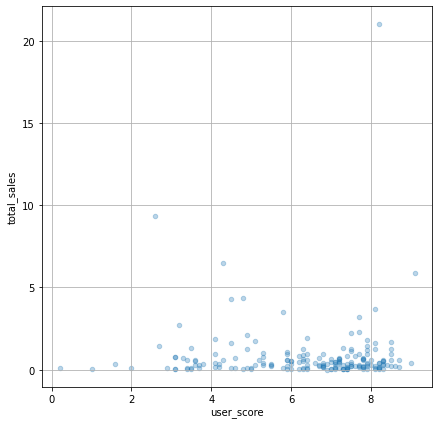

In [45]:
# построим диаграмму рассеяния по платформе PS3 с учетом отзывов пользователей
data_optimal[data_optimal['platform']=='PS3'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(7,7), grid=True)
plt.show;
data_optimal[['user_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.0000,0.3137
total_sales,0.3137,1.0000


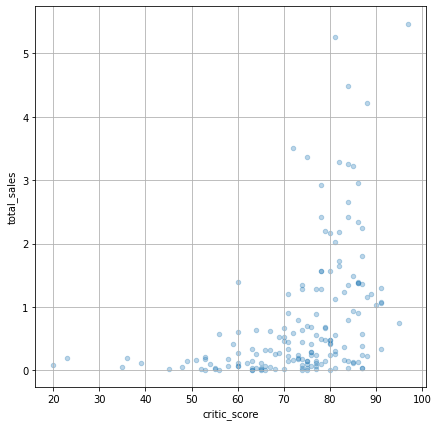

In [46]:
# построим диаграмму рассеяния по платформе XOne с учетом отзывов критиков
data_optimal[data_optimal['platform']=='XOne'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(7,7), grid=True)
plt.show;
data_optimal[['critic_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,-0.002608
total_sales,-0.002608,1.000000


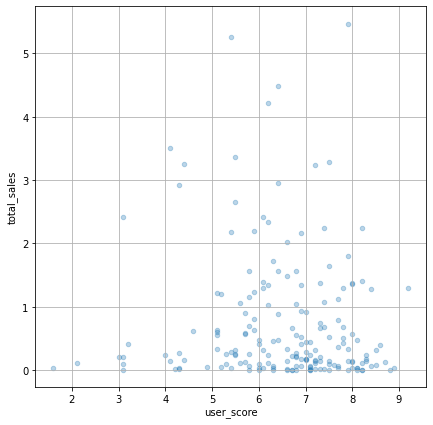

In [47]:
# построим диаграмму рассеяния по платформе XOne с учетом отзывов пользователей
data_optimal[data_optimal['platform']=='XOne'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(7,7), grid=True)
plt.show;
data_optimal[['user_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.0000,0.3137
total_sales,0.3137,1.0000


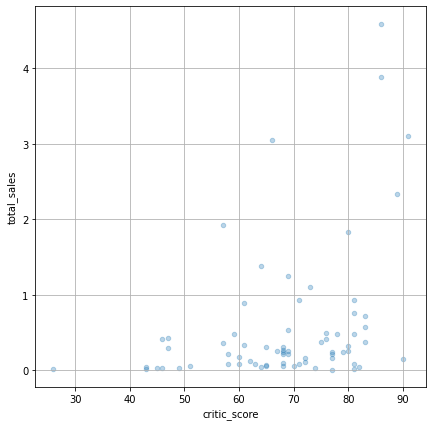

In [48]:
# построим диаграмму рассеяния по платформе 3DS с учетом отзывов критиков
data_optimal[data_optimal['platform']=='3DS'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(7,7), grid=True)
plt.show;
data_optimal[['critic_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,-0.002608
total_sales,-0.002608,1.000000


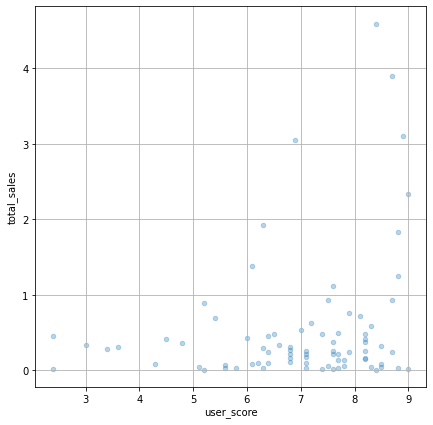

In [49]:
# построим диаграмму рассеяния по платформе 3DS с учетом отзывов пользователей
data_optimal[data_optimal['platform']=='3DS'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(7,7), grid=True)
plt.show;
data_optimal[['user_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.0000,0.3137
total_sales,0.3137,1.0000


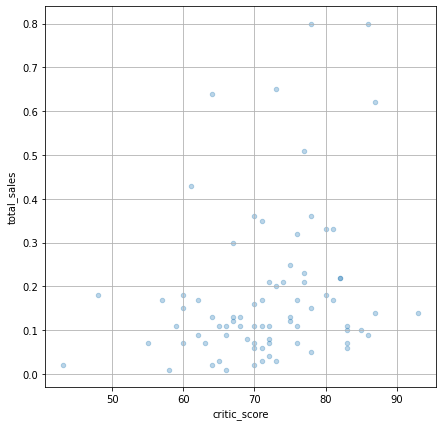

In [50]:
# построим диаграмму рассеяния по платформе PSV с учетом отзывов критиков
data_optimal[data_optimal['platform']=='PSV'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(7,7), grid=True)
plt.show;
data_optimal[['critic_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,-0.002608
total_sales,-0.002608,1.000000


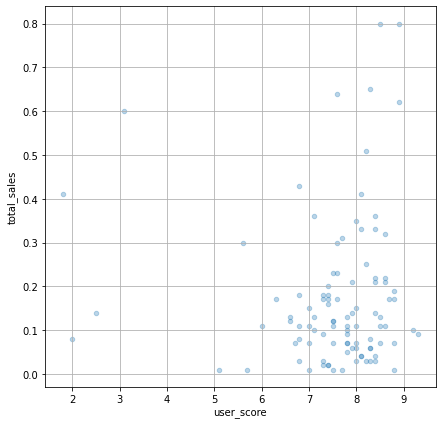

In [51]:
# построим диаграмму рассеяния по платформе PSV с учетом отзывов пользователей
data_optimal[data_optimal['platform']=='PSV'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(7,7), grid=True)
plt.show;
data_optimal[['user_score', 'total_sales']].corr()

<div class="alert alert-info"> 
<b>Комментарий студента</b> 
    
На всех диаграммах рассеивания наблюдается такая же зависмиость (вернее ее отсутствие), как и на ранее рассмотренной платформе PS4: большую часть составляют высокие оценки (более 60 у критиков и более 6 у пользователей).
Судя по коэффициенту корреляции между продажами и пользовательскими оценками связь отсутствует. В отличие от оценки игроков, оценка критиков сильнее отражается на объемах продаж, хотя о сильной прямой зависимости здесь тоже нет.
</div>

#### Распределение игр по жанрам

Для начала сделаем выгрузку жанров со всех платформ по всем годам, чтобы посмотреть какие жанры были успешны за все время.

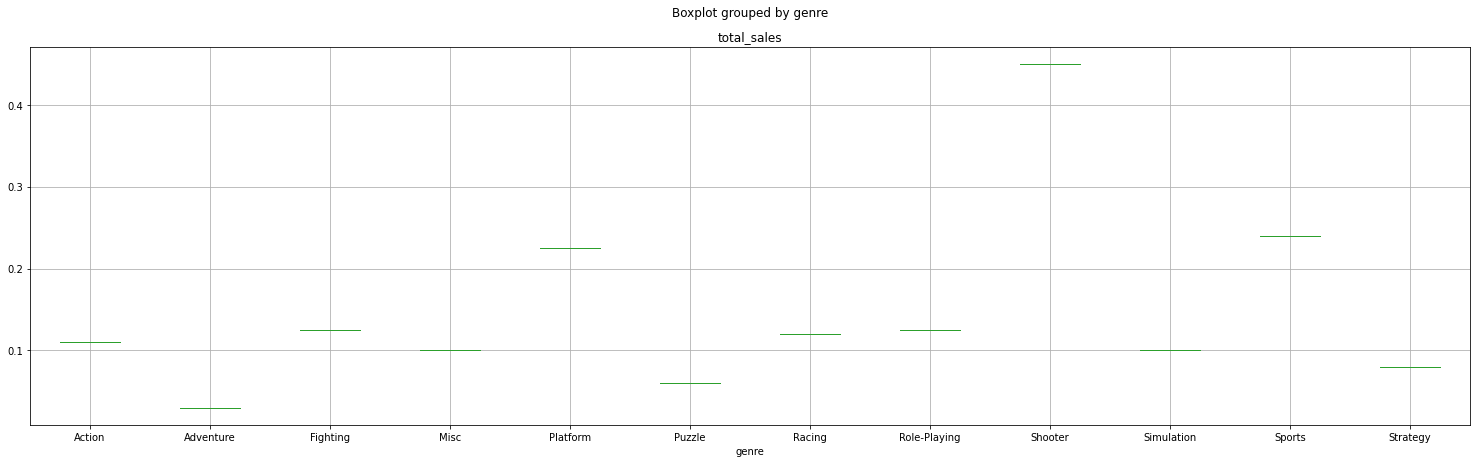

In [52]:
(
    data_optimal.pivot_table(index='genre', values='total_sales', aggfunc='median')
    .boxplot(column='total_sales', by='genre', figsize=(25,7))
)
plt.show()

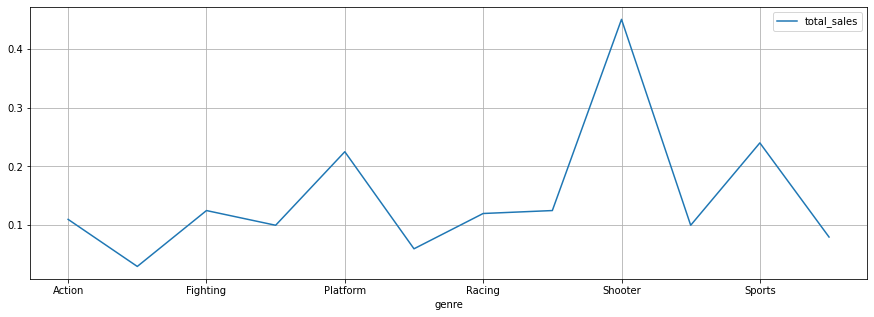

In [53]:
(
    data_optimal.pivot_table(index='genre', values='total_sales', aggfunc='median')
    .plot(grid=True, figsize=(15, 5))
)
plt.show()

In [54]:
data_optimal['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Misc', 'Sports', 'Fighting',
       'Racing', 'Simulation', 'Platform', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

У нас есть следующие жанры компьютерных игр: Sports, Racing, Role-Playing, Platform, Misc, Simulation, Action, Puzzle, Shooter, Fighting, Adventure, Strategy. Среди них самые популярные жанры: Action, Fighting, Platform, Shooter, Sports, Racing.

**Промежуточный итог по 3 шагу:**
1. построив диаграмму, выяснили, что до 90-х годов выпуск компьютерных игр носил незначительный характер. С начала 2002 года наблюдается увеличение выпуска игр, что связано с развитием в общем компьютерной культуры и грамотности у населения, и все большим интересом к такому хобби, как видеоигры. Пик роста пришелся на 2008 -2009 годы. Затем опять наблюдается спад, при этом объемы выпуска в 2016 году практически вернулись на уровень 2001 года. Данные до 90-х исключили из анализа.
2. Существование платформ не бесконечно, у каждой есть свой цикл жизни, ограниченный 7-10 годами. Следовательно, платформы, представленные до 2012 - 2014 г.г., уже не существуют (их заменили новые, более перспективные), мы не будем учитывать их в анализе. Актуальным периодом для прогноза на 2017 год определены следующие года: 2013-2016 г. если взять меньшее количество лет, то непонятно в какой стадии находится конкретная платформа: она только начинает свой рост или уже заканчивает свое существование. Можно отметить следующую закономерность - резкий всплеск продаж после выпуска, 5-летний (в среднем) пик, и спад, растянутый на несколько лет.
3. Было рассмотрено влияние отзывов критиков и пользователей на основе платформы PS4, так как у нее в 2016 году было больше всего продано копий: большую часть составляют высокие оценки (более 60 у критиков и более 6 у пользователей). По данным из диаграммы рассеивания: слабо положительная корреляция 0.39238 по отзывам критиков, и слабо отрицательная корреляция -0.013552 по отзывам покупателей. Судя по коэффициенту корреляции между продажами и пользовательскими оценками связь отсутствует. В отличие от оценки игроков, оценка критиков сильнее отражается на объемах продаж, хотя о сильной прямой зависимости здесь тоже нет.
4. Согласно представленным данным (возможно они неполные) к концу 2016 года игровой рынок находится на спаде, продажи по всем платформам снижаются. Новые платформы пока не появились, имеющиеся не показывают тенденцию к росту, поэтому стоит остановиться на тех, кто появился относительно недавно (не стоит забывать про жизненный цикл платформ) и кто показывает наибольшие из имеющихся объемы продаж: PS4 - 69.25 млн., XOne - 26.15 млн. и 3DS - 15.14 млн.(только за 2016 год). До появления новой платформы эти игры будут пользоваться спросом и приносить магазину выручку
5. По жанрам выделяют следующие самые популярные: Action, Fighting, Platform, Shooter, Sports, Racing.

### Портрет пользователя каждого региона

#### Самые популярные платформы (ТОП-5)

**Определим ТОП-5 популярных платформ в Северной Америке**

In [55]:
# сгруппируем по общей таблице по платформе
data_na_all_platform = data_optimal.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index().head(5)
data_na_all_platform

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


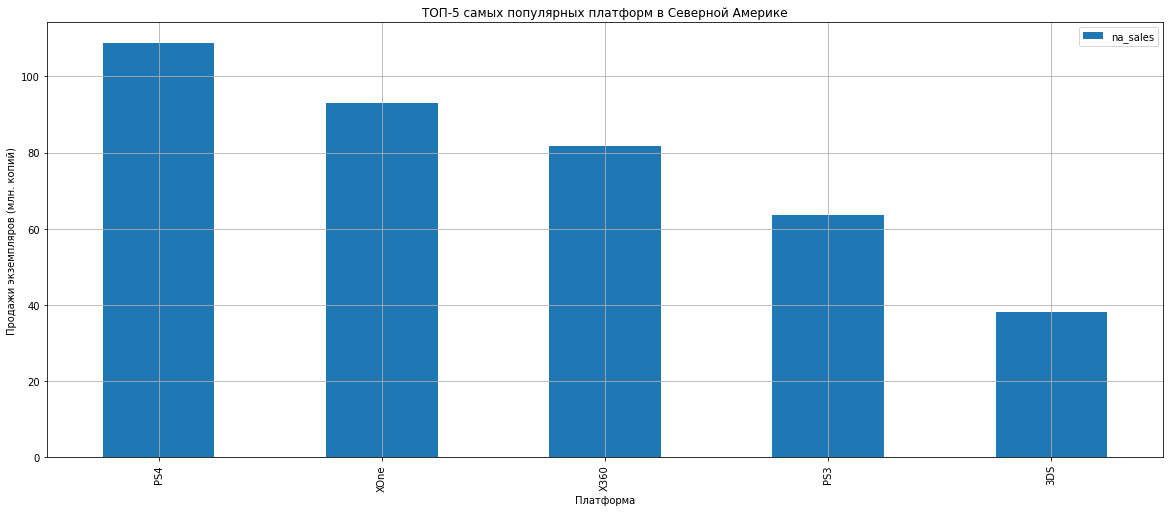

In [56]:
# построим гистограмму
data_na_all_platform.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн. копий)')
plt.show()

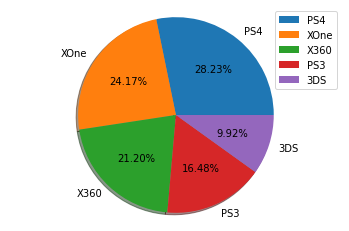

In [57]:
# построим круговую диаграмму
vals = data_na_all_platform['na_sales']
labels = data_na_all_platform['platform']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.2f%%', shadow=True)
ax.axis('equal')
ax.legend(loc='best');

Наибольшую долю в продажах копьютерных игр в Северной Америке занимает платформа PS4 - 108.74 млн. копий или 28.23%. На втором месте XOne - 93.12 млн.копий (24.17%). На третьем - X360 (81.66 млн. копий и 21.20%)

**Определим ТОП-5 популярных платформ в Европе.**

In [58]:
# ТОП-5 самых популярных платформ в Европе по общей таблице группируем по платформе
data_eu_all_platform = data_optimal.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index().head(5)
data_eu_all_platform

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


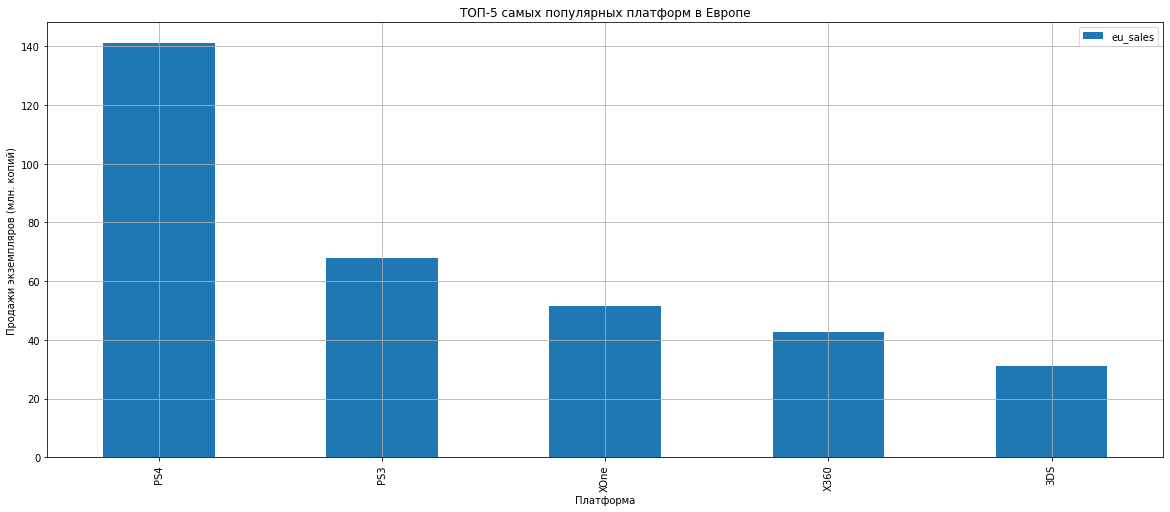

In [59]:
# построим гистограмму
data_eu_all_platform.plot(x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Европе')
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн. копий)')
plt.show()

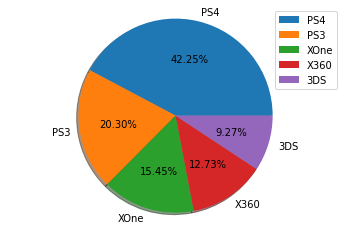

In [60]:
# построим круговую диаграмму
vals = data_eu_all_platform['eu_sales']
labels = data_eu_all_platform['platform']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.2f%%', shadow=True)
ax.axis('equal')
ax.legend(loc='best');

Наибольшую долю в продажах копьютерных игр в Европе занимает платформа PS4 - 141.09 млн. копий или 42.25%. На втором месте PS3 - 67.81 млн.копий (20.30%). На третьем - XOne(51.59 млн. копий и 15.45%)

**Определим ТОП-5 популярных платформ в Японии.**

In [61]:
# ТОП-5 самых популярных платформ в Японии по общей таблице группируем по платформе
data_jp_all_platform = data_optimal.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index().head(5)
data_jp_all_platform

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


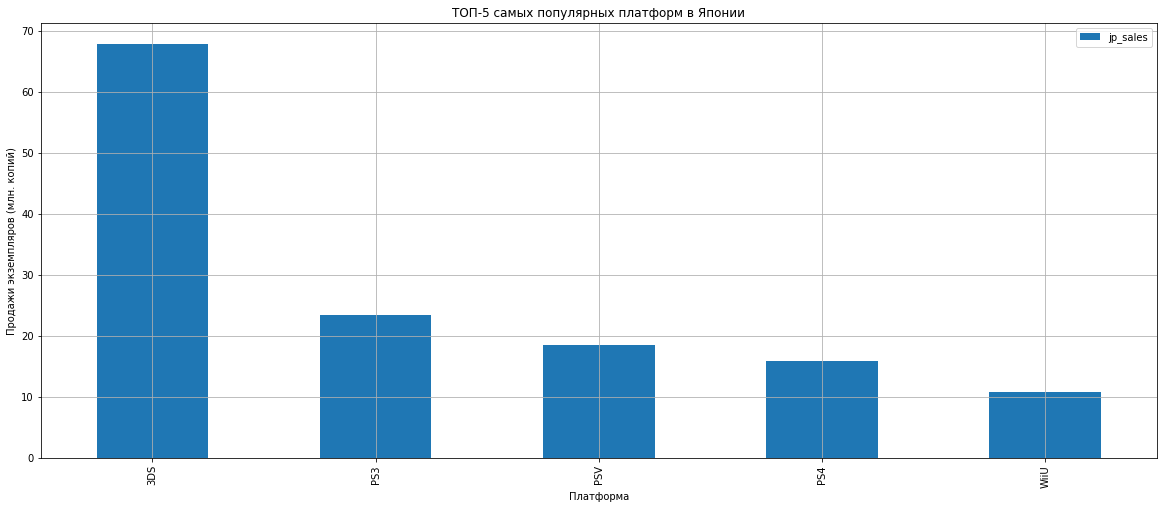

In [62]:
# построим гистограмму
data_jp_all_platform.plot(x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Японии')
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн. копий)')
plt.show()

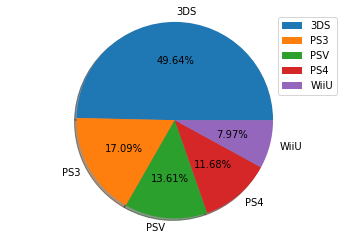

In [63]:
# построим круговую диаграмму
vals = data_jp_all_platform['jp_sales']
labels = data_jp_all_platform['platform']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.2f%%', shadow=True)
ax.axis('equal')
ax.legend(loc='best');

Наибольшую долю в продажах копьютерных игр в Японии занимает платформа 3DS - 67.81 млн. копий или 49.64%. На втором месте PS3 - 23.35 млн.копий (17.09%). На третьем - PSV (18.59 млн. копий или 13.61%).

Северная Америка предпочитает разработки Microsoft (X360 и XOne), а также японской Sony (PS4), в Европе также лидируют PS4, PS3 и  XOne, а вот Япония предпочитает отечественные разработки от Sony (PS3, PSV) и Nintendo (3DS).

#### Самые популярные жанры (ТОП-5).

**Определим ТОП-5 популярных жанров в Северной Америке.**

In [64]:
# ТОП-5 самых популярных жанров в Северной Америке по общей таблице группируем по жанрам
data_na_all_genre = data_optimal.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index().head(5)
data_na_all_genre

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


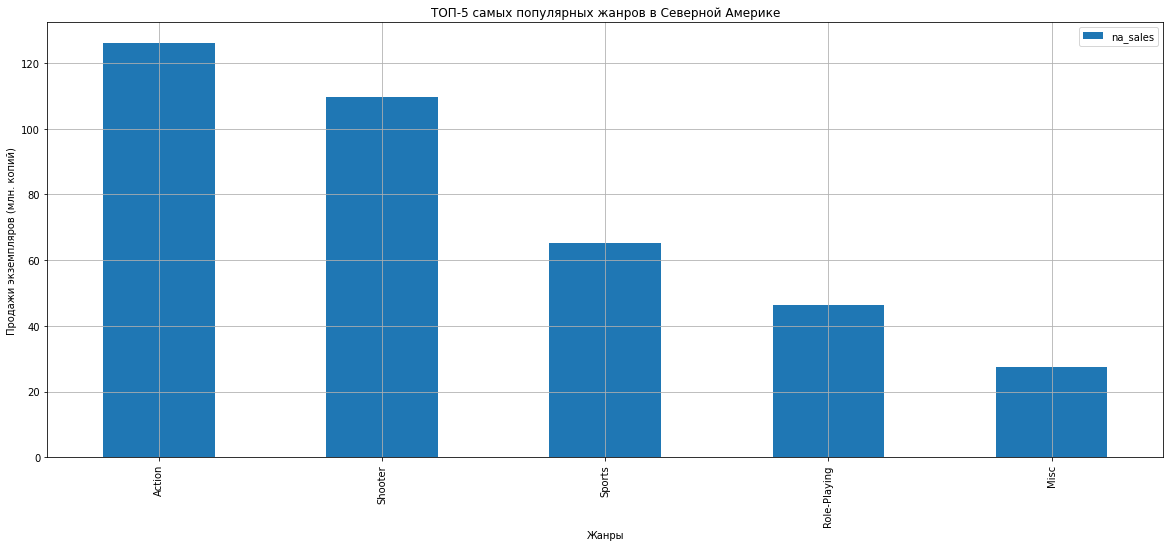

In [65]:
# построим гистограмму
data_na_all_genre.plot(x = 'genre', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Северной Америке')
plt.xlabel('Жанры')
plt.ylabel('Продажи экземпляров (млн. копий)')
plt.show()

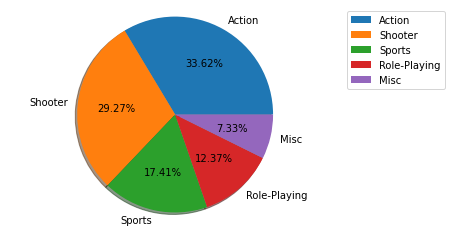

In [66]:
# построим круговую диаграмму
vals = data_na_all_genre['na_sales']
labels = data_na_all_genre['genre']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.2f%%', shadow=True)
ax.axis('equal')
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0));

Игроки в Северной Америке предпочитают жанр Action - 126.05 млн. копий (33.62%), на втором месте - Shooter (109.74 млн. копий или 29.27%), на третьем месте - Sports (65.27 млн.копий или 17.41%).

**Определим ТОП-5 популярных жанров в Европе.**

In [67]:
# ТОП-5 самых популярных жанров в Европе по общей таблице группируем по жанрам
data_eu_all_genre = data_optimal.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index().head(5)
data_eu_all_genre

,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19


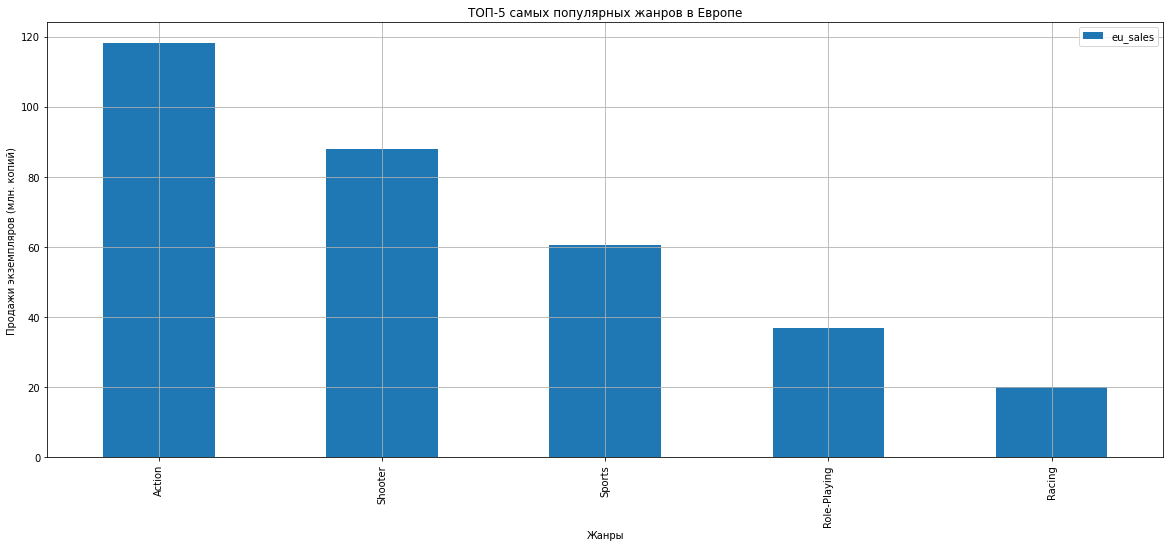

In [68]:
# построим гистограмму
data_eu_all_genre.plot(x = 'genre', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Европе')
plt.xlabel('Жанры')
plt.ylabel('Продажи экземпляров (млн. копий)')
plt.show()

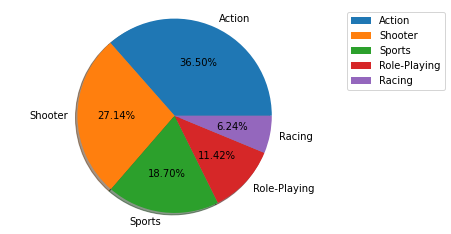

In [69]:
# построим круговую диаграмму
vals = data_eu_all_genre['eu_sales']
labels = data_eu_all_genre['genre']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.2f%%', shadow=True)
ax.axis('equal')
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0));

В Европе следующие предпочтения по жанрам: на первом месте - Action (118.13 млн. копий или 36.50%), на втором месте - Shooter (87.86 млн. копий или 27.14%) и на третьем Sports (60.52 млн. копий или 18.70%). 

**Определим ТОП-5 популярных жанров в Японии.**

In [70]:
# ТОП-5 самых популярных жанров в Японии по общей таблице группируем по жанрам
data_jp_all_genre = data_optimal.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index().head(5)
data_jp_all_genre

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61


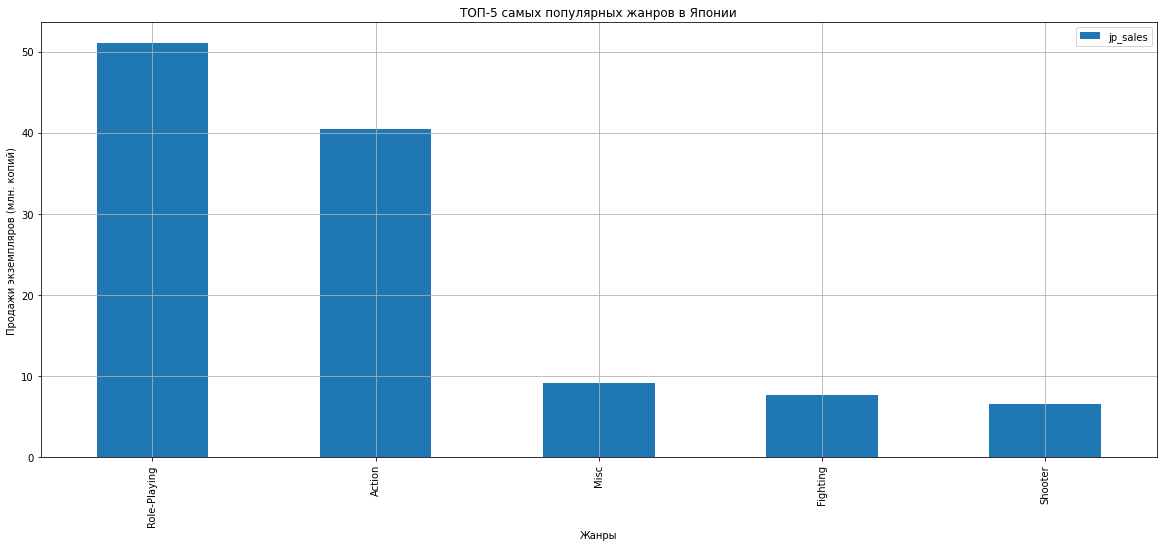

In [71]:
# построим гистограмму
data_jp_all_genre.plot(x = 'genre', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Японии')
plt.xlabel('Жанры')
plt.ylabel('Продажи экземпляров (млн. копий)')
plt.show()

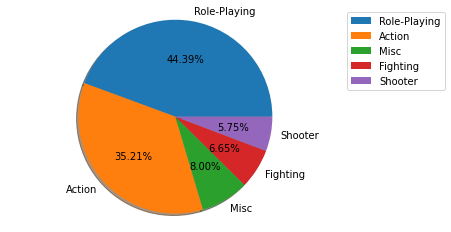

In [72]:
# построим круговую диаграмму
vals = data_jp_all_genre['jp_sales']
labels = data_jp_all_genre['genre']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.2f%%', shadow=True)
ax.axis('equal')
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0));

Япония резко отличается по предпочтениям - на первом месте Role-Playing (51.04 млн. копий или 44.39%) (этот жанр не представлен в ТОП-5 Северной Америки и в ТОП-5 Европы). На втором месте - Action (40.49 млн. копий или 35.21%), на третьем - Misc (9.20 млн. копий или 8.00%) - этот жанр тоже не представлен в ТОП-5 Северной Америки и в ТОП-5 Европы.

Самые популярные жанры в Северной Америке и в Европе - Action, Shooter и Sports. В Японии другие предпочтения - Role-Playing, Action и Misk. Возможно, это связано с тем, что Европа всегда "копирует" Америку, а Япония, как страна с особой культурой, не так подвержена этому влиянию.

#### Влияние рейтинга ESRB на продажи.

In [73]:
data_optimal['rating'].unique()

array(['M', nan, 'E', 'T', 'E10+'], dtype=object)

In [74]:
# посмотрим на влияние рейтинга ESRB на совокупные продажи
data_esrb = data_optimal.groupby('rating')['total_sales'].agg(['count', 'sum']).sort_values(by='sum', ascending = False).reset_index()
data_esrb

,rating,count,sum
0,M,369,371.68
1,E,302,200.16
2,T,333,126.62
3,E10+,252,115.39


In [75]:
# Посмотрим на влияние рейтинга ESRB на продажи в Северной Америке
data_esrb_rating_na = data_optimal.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()
data_esrb_rating_na

,rating,na_sales
0,M,165.21
1,E,79.05
2,E10+,54.24
3,T,49.79


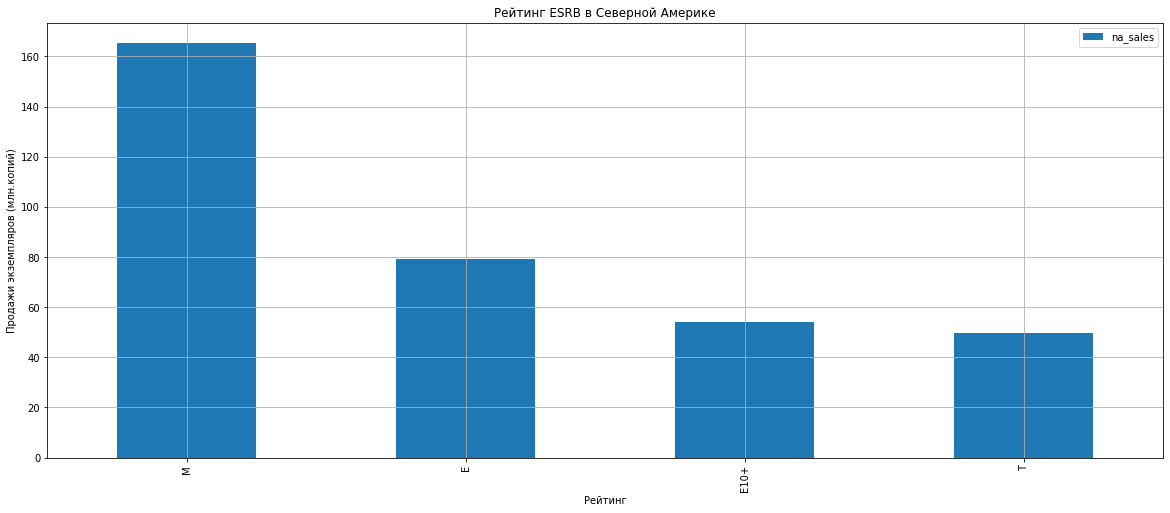

In [76]:
# построим гистограмму
data_esrb_rating_na.plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг ESRB в Северной Америке')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.копий)')
plt.show()

В Северной Америке продано больше всего 165.21 млн. копий компьютерных игр с рейтингом M (Mature) - "для взрослых".

In [77]:
# Посмотрим на влияние рейтинга ESRB на продажи в Европе
data_esrb_rating_eu = data_optimal.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()
data_esrb_rating_eu

,rating,eu_sales
0,M,145.32
1,E,83.36
2,E10+,42.69
3,T,41.95


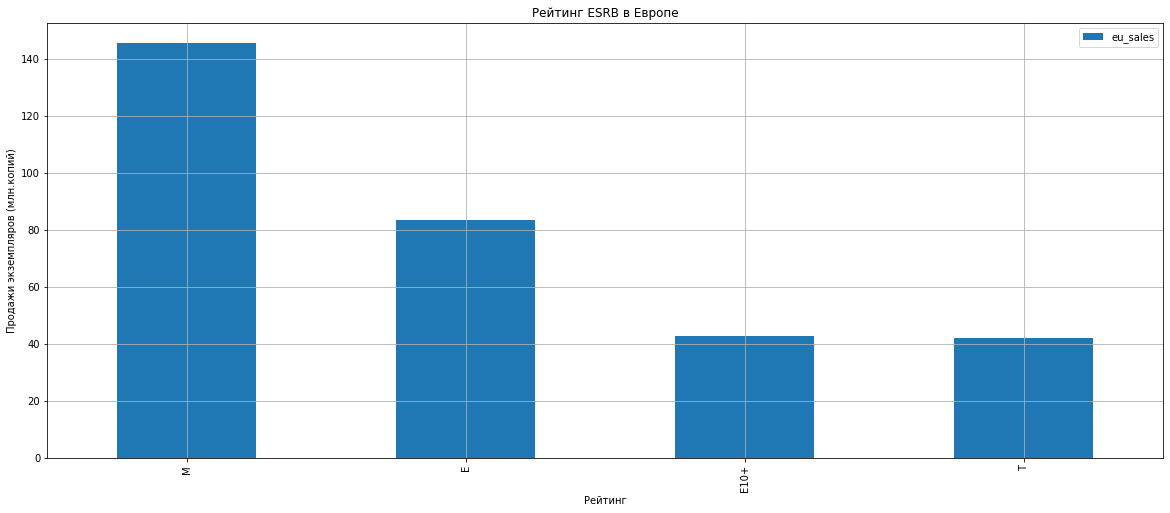

In [78]:
# построим гистограмму
data_esrb_rating_eu.plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг ESRB в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.копий)')
plt.show()

В Европе так же как и в Северной Америке продано больше всего млн. копий компьютерных игр с рейтингом M (Mature) - "для взрослых" - 145.32 млн.копий.

In [79]:
# Посмотрим на влияние рейтинга ESRB на продажи в Японии
data_esrb_rating_jp = data_optimal.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()
data_esrb_rating_jp

,rating,jp_sales
0,T,20.59
1,E,15.14
2,M,14.11
3,E10+,5.89


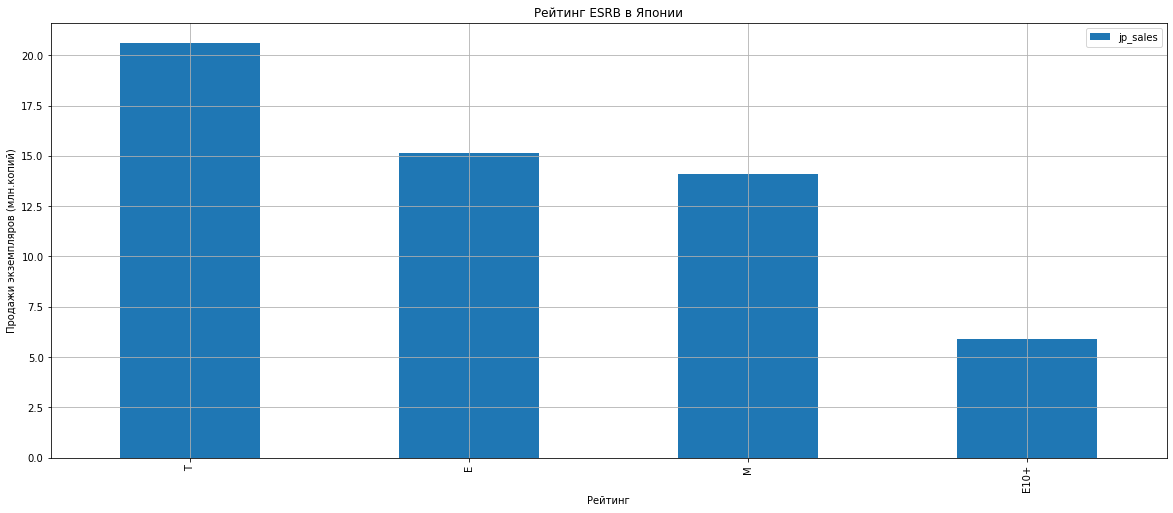

In [80]:
# построим гистограмму
data_esrb_rating_jp.plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг ESRB в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.копий)')
plt.show()

В Японии продано больше всего млн. копий компьютерных игр с рейтингом T (Teen) - "Подростки". Игра подходит для лиц от 13 лет.

In [81]:
# Посмотрим на влияние рейтинга ESRB на продажи в остальных странах
data_esrb_rating_oc = data_optimal.groupby('rating')['other_sales'].sum().sort_values(ascending=False).reset_index()
data_esrb_rating_oc

,rating,other_sales
0,M,47.04
1,E,22.61
2,T,14.29
3,E10+,12.57


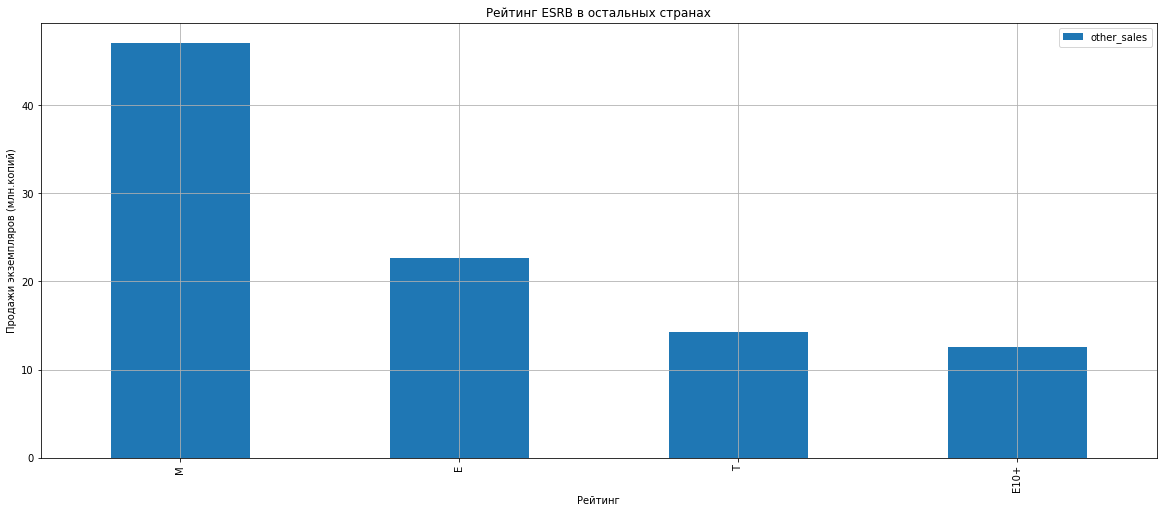

In [82]:
# построим гистограмму
data_esrb_rating_oc.plot(x = 'rating', y = 'other_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг ESRB в остальных странах')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.копий)')
plt.show()

В остальных странах продано больше всего млн. копий компьютерных игр с рейтингом M (Mature) - "для взрослых".

<div class="alert alert-info"> 
<b>Комментарий студента v.1</b> 
    
Исправим код в соответствии с рекомендациями.
</div>

In [83]:
#  напишем функцию для замены пропущенных значений в столбце 'rating' на значение 'unknow'
def replace_wrong_rating(nan_rating, unknow_rating):
    data['rating'] = data['rating'].replace(nan_rating, unknow_rating)
    
replace_wrong_rating(np.NaN, 'unknow')

data['rating'].unique()

array(['E', 'unknow', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [84]:
data_optimal = data.query('2013 <= year_of_release <= 2016')
data_optimal['rating'].unique()

array(['M', 'unknow', 'E', 'T', 'E10+'], dtype=object)

<div class="alert alert-info"> 
<b>Комментарий студента v.1</b> 
    
Повторим все вычисления после дополнительной предобработки данных столбца 'rating'.
</div>

In [85]:
# посмотрим на влияние рейтинга ESRB на совокупные продажи
data_esrb = data_optimal.groupby('rating')['total_sales'].agg(['count', 'sum']).sort_values(by='sum', ascending = False).reset_index()
data_esrb

,rating,count,sum
0,M,369,371.68
1,unknow,977,276.84
2,E,302,200.16
3,T,333,126.62
4,E10+,252,115.39


In [86]:
# Посмотрим на влияние рейтинга ESRB на продажи в Северной Америке
data_esrb_rating_na = data_optimal.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()
data_esrb_rating_na

,rating,na_sales
0,M,165.21
1,unknow,89.42
2,E,79.05
3,E10+,54.24
4,T,49.79


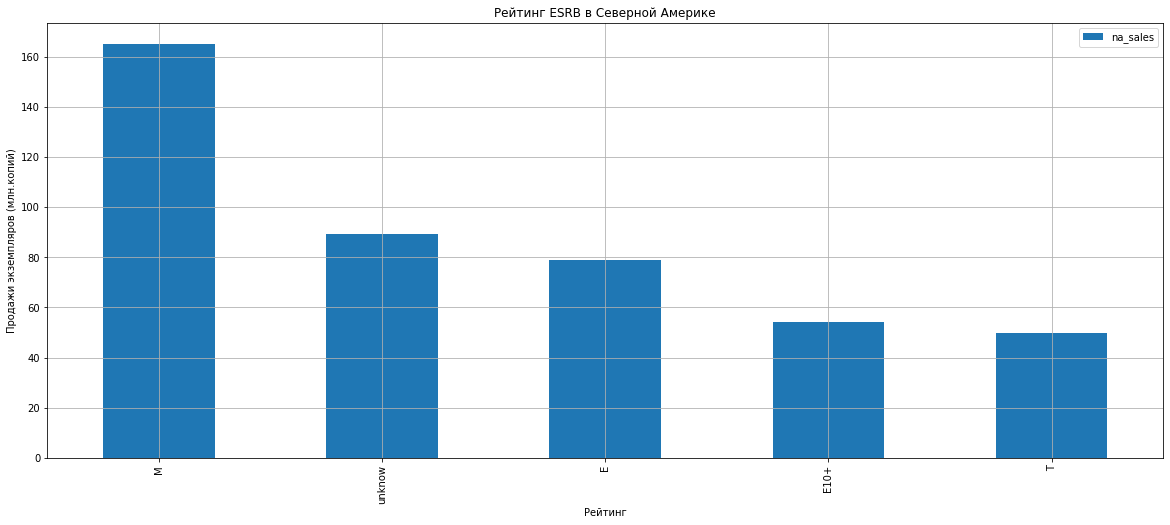

In [87]:
# построим гистограмму
data_esrb_rating_na.plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг ESRB в Северной Америке')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.копий)')
plt.show()

<div class="alert alert-info"> 
<b>Комментарий студента v.1</b> 
    
В Северной Америке продано больше всего 165.21 млн. копий компьютерных игр с рейтингом M (Mature) - "для взрослых". А вот на втором месте после проставления так называемой заглушки появился рейтинг "unknow".
</div>

In [88]:
# Посмотрим на влияние рейтинга ESRB на продажи в Европе
data_esrb_rating_eu = data_optimal.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()
data_esrb_rating_eu

,rating,eu_sales
0,M,145.32
1,E,83.36
2,unknow,78.91
3,E10+,42.69
4,T,41.95


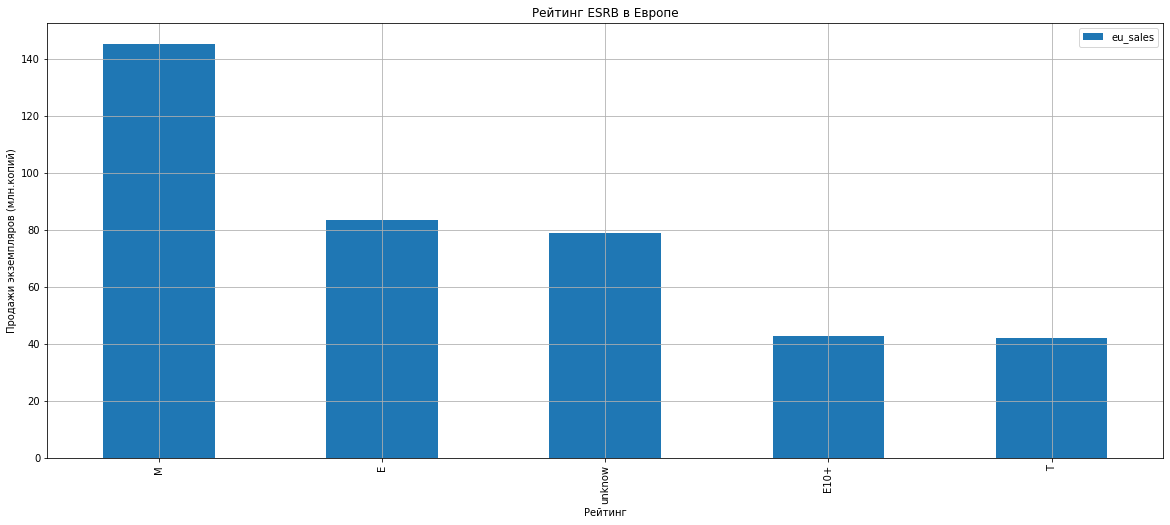

In [89]:
# построим гистограмму
data_esrb_rating_eu.plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг ESRB в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.копий)')
plt.show()

<div class="alert alert-info"> 
<b>Комментарий студента v.1</b> 
    
В Европе так же как и в Северной Америке продано больше всего млн. копий компьютерных игр с рейтингом M (Mature) - "для взрослых" - 145.32 млн.копий. Рейтинг unknow находится на третьем, потому что маркировка ESRB в основном применяется в Северной Америке.
</div>

In [90]:
# Посмотрим на влияние рейтинга ESRB на продажи в Японии
data_esrb_rating_jp = data_optimal.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()
data_esrb_rating_jp

,rating,jp_sales
0,unknow,85.05
1,T,20.59
2,E,15.14
3,M,14.11
4,E10+,5.89


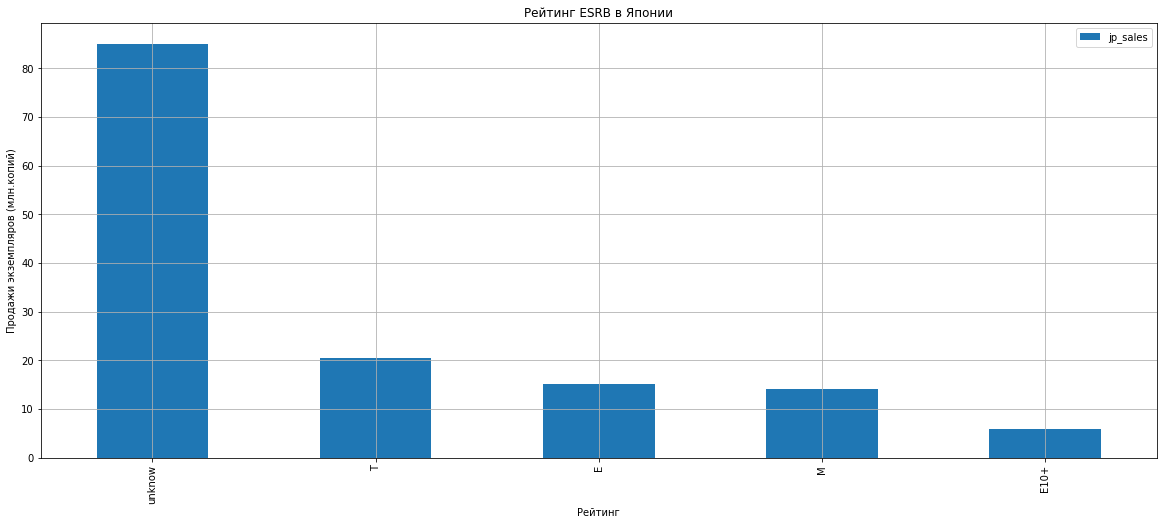

In [91]:
# построим гистограмму
data_esrb_rating_jp.plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг ESRB в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.копий)')
plt.show()

<div class="alert alert-info"> 
<b>Комментарий студента v.1</b> 
    
В Японии продано больше всего млн. копий компьютерных игр с рейтингом unknow (85.05 млн. копий), и на втором T (Teen) - "Подростки" - игра подходит для лиц от 13 лет. Также как и в Европе это связано с тем, что ERSB применяется в основном в Северной Америке.
</div>

In [92]:
# Посмотрим на влияние рейтинга ESRB на продажи в остальных странах
data_esrb_rating_oc = data_optimal.groupby('rating')['other_sales'].sum().sort_values(ascending=False).reset_index()
data_esrb_rating_oc

,rating,other_sales
0,M,47.04
1,unknow,23.46
2,E,22.61
3,T,14.29
4,E10+,12.57


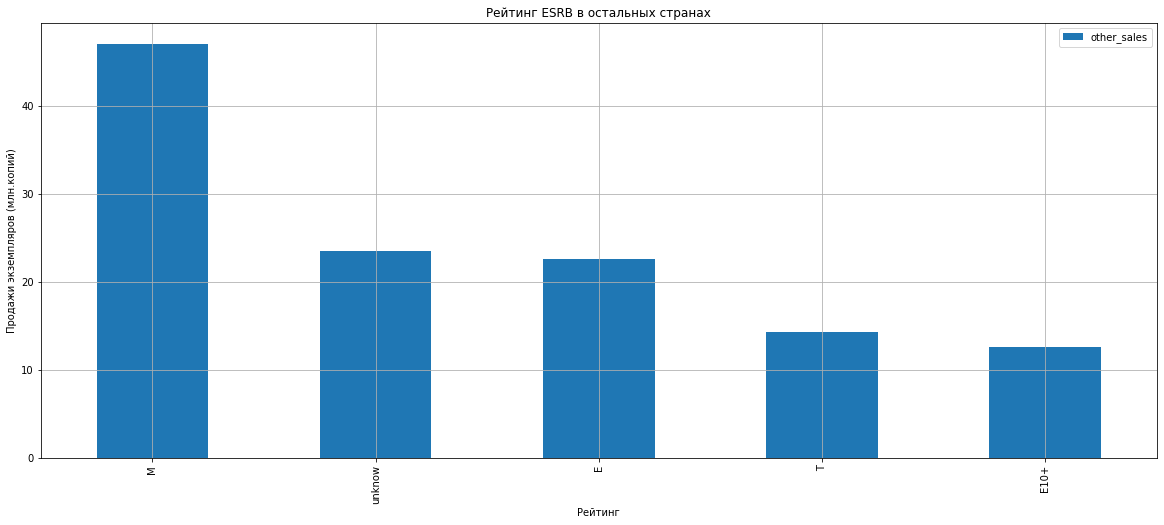

In [93]:
# построим гистограмму
data_esrb_rating_oc.plot(x = 'rating', y = 'other_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг ESRB в остальных странах')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.копий)')
plt.show()

<div class="alert alert-info"> 
<b>Комментарий студента v.1</b> 
    
В остальных странах продано больше всего млн. копий компьютерных игр с рейтингом M (Mature) - "для взрослых". Unknow, как и в Северной Америке, располагается на втором месте.
</div>

**Промежуточный итог по 4 шагу:**

В этой части мы выделили ТОП-5 самых популярных платформ и жанров в разрезе каждого региона. Северная Америка предпочитает разработки Microsoft (X360 и XOne), а также японской Sony (PS4), в Европе также лидируют PS4, PS3 и XOne, а вот Япония предпочитает отечественные разработки от Sony (PS3, PSV) и Nintendo (3DS).
Самые популярные жанры в Северной Америке и в Европе - Action, Shooter и Sports. В Японии другие предпочтения - Role-Playing, Action и Misk. Возможно, это связано с тем, что Европа всегда "копирует" Америку, а Япония, как страна с особой культурой, не так подвержена этому влиянию.
Во всех странах, кроме Японии, больше всего продано компьютерных игр с рейтингом M (Mature) - "для взрослых". В Японии лидирует рейтинг T (Teen) - "Подростки". **Игры без рейтинга присутствуют в тройке лидеров каждого региона.**

### Проверка гипотез

Будем проверять следующие гипотезы:
1. Средние пользовательские рейтинги платформ XOne и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Гипотеза:
средние пользовательские рейтинги платформ XOne и PC одинаковые.**

Для проверки гипотезы "средние пользовательские рейтинги платформ XOne и PC одинаковые" в качестве нулевой и альтернативной гипотезы берем следующее:

H0: средние рейтинги по платформам одинаковые

H1: средние рейтинги по платформам разные

In [94]:
# список пользовательских рейтингов
data_optimal['user_score'].unique()

array([8.2, 8.1, nan, 8.3, 2.6, 4.3, 5.7, 5. , 6.5, 9.1, 6.1, 7.9, 5.4,
       8.4, 6.4, 3.4, 8.5, 4.8, 9. , 4.9, 4.5, 6.2, 4.2, 6.3, 7.7, 9.2,
       7.6, 8.7, 6.7, 3.7, 7. , 6.9, 4.1, 5.8, 5.6, 6.8, 5.5, 7.5, 4.4,
       5.9, 7.2, 8.9, 3.9, 7.8, 3.2, 8.6, 3.1, 7.4, 7.3, 6.6, 6. , 4.7,
       7.1, 8.8, 5.1, 3. , 2.9, 2.7, 2.2, 8. , 3.5, 5.2, 5.3, 3.8, 4.6,
       3.3, 9.3, 4. , 3.6, 2.4, 2.8, 1.8, 1.7, 1.6, 2.1, 2. , 1.5, 0.7,
       2.5, 0.2, 1.9, 1.3, 1. , 1.4, 2.3])

In [95]:
# исключаем из общего датасета строки с пропусками (а они были)
data_clean = data_optimal.dropna(subset=['user_score'])
data_clean['user_score'].unique()

array([8.2, 8.1, 8.3, 2.6, 4.3, 5.7, 5. , 6.5, 9.1, 6.1, 7.9, 5.4, 8.4,
       6.4, 3.4, 8.5, 4.8, 9. , 4.9, 4.5, 6.2, 4.2, 6.3, 7.7, 9.2, 7.6,
       8.7, 6.7, 3.7, 7. , 6.9, 4.1, 5.8, 5.6, 6.8, 5.5, 7.5, 4.4, 5.9,
       7.2, 8.9, 3.9, 7.8, 3.2, 8.6, 3.1, 7.4, 7.3, 6.6, 6. , 4.7, 7.1,
       8.8, 5.1, 3. , 2.9, 2.7, 2.2, 8. , 3.5, 5.2, 5.3, 3.8, 4.6, 3.3,
       9.3, 4. , 3.6, 2.4, 2.8, 1.8, 1.7, 1.6, 2.1, 2. , 1.5, 0.7, 2.5,
       0.2, 1.9, 1.3, 1. , 1.4, 2.3])

В Python есть специальный метод для проверки гипотезы о равенстве среднего двух совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var). Применим ttest_ind в нашем случае.

In [96]:
# сделаем две необходимые выборки: по платформе XOne и PC
data_xone = data_clean[data_clean['platform'] == 'XOne']
data_pc = data_clean[data_clean['platform'] == 'PC']

# зададим две выборки для конкретных столбцов (user_score).
xone_1 = data_xone['user_score']
pc_1 = data_pc['user_score']

alpha = .05 # установим следующий критический уровень статистической значимости

# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(xone_1, pc_1)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Гипотезу о том, что средние пользовательские рейтинги платформ XOne и PC одинаковы, не получилось опровергнуть. Следовательно, у нас нет достаточных оснований утверждать, что средние пользовательские рейтинги платформ XOne и PC различаются.

**Гипотеза: cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Для проверки гипотезы "cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные" в качестве нулевой и альтернативной гипотезы берем следующее:

H0: средние рейтинги по жанрам одинаковые

H1: средние рейтинги по жанрам разные

In [97]:
data_clean['genre'].unique()

array(['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing',
       'Platform', 'Misc', 'Simulation', 'Fighting', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

Для проверки данной гипотезы также применяем ttest_ind.

In [98]:
# сделаем две необходимые выборки: по жанру Action и Sports
data_action = data_clean[data_clean['genre'] == 'Action']
data_sports = data_clean[data_clean['genre'] == 'Sports']

# зададим две выборки для конкретных столбцов (user_score).
action_1 = data_action['user_score']
sports_1 = data_sports['user_score']

alpha = .05 # установим следующий критический уровень статистической значимости

# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(action_1, sports_1)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Гипотезу "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные" удалось подтвердить.

**Промежуточный вывод по шагу 5:**

Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

Cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различаются.


### Общий вывод

Представленные для анализа данные содержат исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы за 1980-2016 годы.
На первом шаге было выявлено несоответствие наименования столбцов регистру, несоответствие типов данных в столбце year_of_release и user_score, выявлены пропуски в столбцах name, year_of_release, genre, critic_score, user_score, rating.

Результаты предобработки данных:

- названия столбцов приведены к нижнему регистру, так как формат разных регистров в наименовании столбцов считается некорректным.
- значения user_score, равные 'tbd' (To Be Determined) изменено на пропуски значений (значение nan).
- в двух столбцах 'year_of_release' и 'user_score' типы данных изменены на int и float соответственно.
- удалены строки с пропусками данных в столбцах name и genre (2 строки), year_of_release (269 строк).
- пропуски в столбцах name, year_of_release, genre удалены. Пропуски в столбцах critic_score, user_score, rating оставим без изменения.
- добавлен новый столбец total_sales с суммарными продажами во всех регионах.

Результаты исследовательского анализа данных:

До 90-х годов выпуск компьютерных игр носил незначительный характер. С начала 2002 года наблюдается увеличение выпуска игр, что связано с развитием в общем компьютерной культуры и грамотности у населения, и все большим интересом к такому хобби, как видеоигры. Пик роста пришелся на 2008 -2009 годы. Затем опять наблюдается спад, при этом объемы выпуска в 2016 году практически вернулись на уровень 2001 года. Данные до 90-х исключили из анализа.
Существование платформ не бесконечно, у каждой есть свой цикл жизни, ограниченный 7-10 годами. Следовательно, платформы, представленные до 2012 - 2014 г.г., уже не существуют (их заменили новые, более перспективные), мы не будем учитывать их в анализе. Актуальным периодом для прогноза на 2017 год определены следующие года: 2013-2016 г. если взять меньшее количество лет, то непонятно в какой стадии находится конкретная платформа: она только начинает свой рост или уже заканчивает свое существование. Можно отметить следующую закономерность - резкий всплеск продаж после выпуска, 5-летний (в среднем) пик, и спад, растянутый на несколько лет.
Было рассмотрено влияние отзывов критиков и пользователей на основе платформы PS4, так как у нее в 2016 году было больше всего продано копий: большую часть составляют высокие оценки (более 60 у критиков и более 6 у пользователей). По данным из диаграммы рассеивания: слабо положительная корреляция 0.39238 по отзывам критиков, и слабо отрицательная корреляция -0.013552 по отзывам покупателей. Судя по коэффициенту корреляции между продажами и пользовательскими оценками связь отсутствует. В отличие от оценки игроков, оценка критиков сильнее отражается на объемах продаж, хотя о сильной прямой зависимости здесь тоже нет. **Такая же картина наблюдается еще по 5 выбранным платформам: X360, PS3, XOne, 3DS и PSV.**
Согласно представленным данным (возможно они неполные) к концу 2016 года игровой рынок находится на спаде, продажи по всем платформам снижаются. Новые платформы пока не появились, имеющиеся не показывают тенденцию к росту, поэтому стоит остановиться на тех, кто появился относительно недавно (не стоит забывать про жизненный цикл платформ) и кто показывает наибольшие из имеющихся объемы продаж: PS4 - 69.25 млн., XOne - 26.15 млн. и 3DS - 15.14 млн.(только за 2016 год). До появления новой платформы эти игры будут пользоваться спросом и приносить магазину выручку
По жанрам выделяют следующие самые популярные: Action, Fighting, Platform, Shooter, Sports, Racing.

"Портреты" пользователей.

В этой части мы выделили ТОП-5 самых популярных платформ и жанров в разрезе каждого региона. Северная Америка предпочитает разработки Microsoft (X360 и XOne), а также японской Sony (PS4), в Европе также лидируют PS4, PS3 и XOne, а вот Япония предпочитает отечественные разработки от Sony (PS3, PSV) и Nintendo (3DS). Самые популярные жанры в Северной Америке и в Европе - Action, Shooter и Sports. В Японии другие предпочтения - Role-Playing, Action и Misk. Возможно, это связано с тем, что Европа всегда "копирует" Америку, а Япония, как страна с особой культурой, не так подвержена этому влиянию. Во всех странах, кроме Японии, больше всего продано компьютерных игр с рейтингом M (Mature) - "для взрослых". В Японии лидирует рейтинг T (Teen) - "Подростки".**Игры без рейтинга присутствуют в тройке лидеров каждого региона.**

Были проведены статистические t-тесты для проверки гипотез по сравнению пользовательских рейтингов платформ XOne и PC, а также жанров Action (англ. «действие», экшен-игры) и Sports(англ. «спортивные соревнования»). Результаты следующие:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

Cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различаются.

Рекомендации:

рынок компьютерных игр разных регионов имеет свои особенности, а именно:
1. Северная Америка предпочитает разработки Microsoft (X360 и XOne), а также японской Sony (PS4), в Европе также лидируют PS4, PS3 и XOne, а вот Япония предпочитает отечественные разработки от Sony (PS3, PSV) и Nintendo (3DS).
2. Наиболее перспективными для составления прогноза являются в Северной Америке и в Европе игровые жанры - Action, Shooter и Sports. В Японии другие предпочтения - Role-Playing, Action и Misk.    
3. Во всех странах, кроме Японии, больше всего продано компьютерных игр с рейтингом M (Mature) - "для взрослых". В Японии лидирует рейтинг T (Teen) - "Подростки".
    
Необходимо учитывать эти особенности и закономерности при планировании продаж на следующий период.